HOUSING: PRICE PREDICTION

Problem Statement:

Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market and there are various companies working in the domain. Data science comes as a very important tool to solve problems in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, recommendation systems are some of the machine learning techniques used for achieving the business goals for housing companies. Our problem is related to one such housing company.

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.
The company is looking at prospective properties to buy houses to enter the market. You are required to build a model using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest in them or not. For this company wants to know:

• Which variables are important to predict the price of variable?
• How do these variables describe the price of the house?

Business Goal:

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the management to understand the pricing dynamics of a new market.

Technical Requirements:
• Data contains 1460 entries each having 81 variables.
• Data contains Null values. You need to treat them using the domain knowledge and your own understanding.
• Extensive EDA has to be performed to gain relationships of important variable and price.
• Data contains numerical as well as categorical variable. You need to handle them accordingly.
• You have to build Machine Learning models, apply regularization and determine the optimal values of Hyper Parameters.
• You need to find important features which affect the price positively or negatively.
• Two datasets are being provided to you (test.csv, train.csv). You will train on train.csv dataset and predict on test.csv file.


In [314]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle 

import warnings
warnings.filterwarnings('ignore')

In [315]:
#displaying all the columns in the dataset
pd. set_option("display.max_columns", None)

#displaying all the rows in the dataset
pd.set_option("display.max_rows",None)

In [316]:
# Reading train.csv file
train = pd.read_csv("https://raw.githubusercontent.com/Sankalpmahapatra10/Practice_Projects/main/train.csv")
train.head()


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1         Lvl    AllPub    Inside       Mod        NAmes       Norm   
2         Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4         Lvl    AllPub       FR2       Gtl       NWAmes       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm   TwnhsE     1Story            6            5       1976   
1       Norm     1Fam     1Story            8            6       1970   
2       Norm     1Fam     2Story            7            5       1996   
3       Norm     1Fam     1Story            6            6       1977   
4       Norm     1Fam     1Story            6            7       1977   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1976     Gable  CompShg     Plywood     Plywood       None   
1          1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2          1997     Gable  CompShg     MetalSd     MetalSd       None   
3          1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4          2000     Gable  CompShg     CemntBd     CmentBd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       Gd       TA           No   
1         0.0        Gd        Gd      PConc       TA       Gd           Gd   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3       480.0        TA        TA     CBlock       Gd       TA           No   
4       126.0        Gd        TA     CBlock       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          ALQ         120          Unf           0        958         1078   
1          ALQ         351          Rec         823       1043         2217   
2          GLQ         862          Unf           0        255         1117   
3          BLQ         705          Unf           0       1139         1844   
4          ALQ        1246          Unf           0        356         1602   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       958         0             0   
1    GasA        Ex          Y      SBrkr      2217         0             0   
2    GasA        Ex          Y      SBrkr      1127       886             0   
3    GasA        Ex          Y      SBrkr      1844         0             0   
4    GasA        Gd          Y      SBrkr      1602         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        958             0             0         2         0             2   
1       2217             1             0         2         0             4   
2       2013             1             0         2         1             3   
3       1844             0             0         2         0             3   
4       1602             0             1         2         0             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           1          TA   
1             1          Gd             8        Typ           1          TA   
2             1          TA             8        Typ           1          TA   
3             1          TA       

In [317]:
train.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1163  289          20       RL          NaN     9819   Pave   NaN      IR1   
1164  554          20       RL         67.0     8777   Pave   NaN      Reg   
1165  196         160       RL         24.0     2280   Pave   NaN      Reg   
1166   31          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167  617          60       RL          NaN     7861   Pave   NaN      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1163         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
1164         Lvl    AllPub    Inside       Gtl      Edwards      Feedr   
1165         Lvl    AllPub       FR2       Gtl      NPkVill       Norm   
1166         Lvl    AllPub    Inside       Gtl       IDOTRR      Feedr   
1167         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1163       Norm     1Fam     1Story            5            5       1967   
1164       Norm     1Fam     1Story            4            5       1949   
1165       Norm    Twnhs     2Story            6            6       1976   
1166       Norm     1Fam     2Story            4            4       1920   
1167       Norm     1Fam     2Story            6            5       2002   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1163          1967     Gable  CompShg     MetalSd     MetalSd    BrkFace   
1164          2003     Gable  CompShg     VinylSd     VinylSd       None   
1165          1976     Gable  CompShg     Plywood     Brk Cmn       None   
1166          1950   Gambrel  CompShg     BrkFace     BrkFace       None   
1167          2003     Gable  CompShg     VinylSd     VinylSd       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1163        31.0        TA        Gd     CBlock       TA       TA   
1164         0.0        TA        TA     CBlock      NaN      NaN   
1165         0.0        TA        TA     CBlock       Gd       TA   
1166         0.0        TA        Fa     BrkTil       TA       TA   
1167         0.0        Gd        TA      PConc       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1163           No          BLQ         450          Unf           0   
1164          NaN          NaN           0          NaN           0   
1165           No          ALQ         566          Unf           0   
1166           No          Unf           0          Unf           0   
1167           No          GLQ         457          Unf           0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1163        432          882    GasA        TA          Y      SBrkr   
1164          0            0    GasA        Ex          Y      SBrkr   
1165        289          855    GasA        TA          Y      SBrkr   
1166        649          649    GasA        TA          N      SBrkr   
1167        326          783    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1163       900         0             0        900             0             0   
1164      1126         0             0       1126             0             0   
1165       855       601             0       1456             0             0   
1166       649       668             0       1317             0             0   
1167       807       702             0       1509             1             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1163         1         0             3             1          TA   
1164         2         0             2             1          Gd   
1165         2         1             3             1          TA   
1166         1         0             3             1          TA   
1167         2         1             3             1          Gd   

      To

In [318]:
# Reading test.csv file
test = pd.read_csv("https://raw.githubusercontent.com/Sankalpmahapatra10/Practice_Projects/main/test.csv")
test.head()


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         HLS    AllPub    Corner       Gtl      StoneBr       Norm   
1         Lvl    AllPub   CulDSac       Gtl      StoneBr       Norm   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Bnk    AllPub    Inside       Gtl      Crawfor       Norm   
4         Lvl    AllPub   CulDSac       Gtl      Somerst      Feedr   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            9            5       2005   
1       Norm   TwnhsE     1Story            8            5       1984   
2       Norm     1Fam     1Story            8            5       2001   
3       Norm     1Fam     2Story            7            7       1941   
4       Norm     1Fam     2Story            6            5       2007   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2006       Hip  CompShg     VinylSd     VinylSd      Stone   
1          1984     Gable  CompShg     HdBoard     HdBoard       None   
2          2001       Hip  CompShg     VinylSd     VinylSd       None   
3          1950     Gable  CompShg     MetalSd     MetalSd       None   
4          2007     Gable  CompShg     VinylSd     VinylSd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       200.0        Gd        TA      PConc       Ex       TA           Gd   
1         0.0        Gd        TA     CBlock       Gd       TA           Av   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3         0.0        TA        TA     CBlock       TA       TA           No   
4        74.0        Gd        TA      PConc       Gd       TA           Mn   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ        1249          Unf           0        673         1922   
1          GLQ        1036          Unf           0        184         1220   
2          Unf           0          Unf           0       1753         1753   
3          Rec         275          Unf           0        429          704   
4          Unf           0          Unf           0        894          894   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr      1922         0             0   
1    GasA        Gd          Y      SBrkr      1360         0             0   
2    GasA        Ex          Y      SBrkr      1788         0             0   
3    GasA        Ex          Y      SBrkr       860       704             0   
4    GasA        Ex          Y      SBrkr       894      1039             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1922             1             0         2         0             3   
1       1360             1             0         1         0             1   
2       1788             0             0         2         0             3   
3       1564             0             0         1         1             3   
4       1933             0             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           1          Gd   
1             1          Gd             4        Typ           1          Ex   
2             1          Ex             7        Typ           1          TA   
3             1          Fa  

In [319]:
test.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
287    83          20       RL         78.0    10206   Pave   NaN      Reg   
288  1048          20       RL         57.0     9245   Pave   NaN      IR2   
289    17          20       RL          NaN    11241   Pave   NaN      IR1   
290   523          50       RM         50.0     5000   Pave   NaN      Reg   
291  1379         160       RM         21.0     1953   Pave   NaN      Reg   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
287         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
288         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
289         Lvl    AllPub   CulDSac       Gtl        NAmes       Norm   
290         Lvl    AllPub    Corner       Gtl      BrkSide      Feedr   
291         Lvl    AllPub    Inside       Gtl       BrDale       Norm   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
287       Norm     1Fam     1Story            8            5       2007   
288       Norm     1Fam     1Story            5            5       1994   
289       Norm     1Fam     1Story            6            7       1970   
290       Norm     1Fam     1.5Fin            6            7       1947   
291       Norm    Twnhs     2Story            6            5       1973   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
287          2007     Gable  CompShg     VinylSd     VinylSd      Stone   
288          1995     Gable  CompShg     VinylSd     VinylSd       None   
289          1970     Gable  CompShg     Wd Sdng     Wd Sdng    BrkFace   
290          1950     Gable  CompShg     CemntBd     CmentBd       None   
291          1973     Gable  CompShg     HdBoard     HdBoard    BrkFace   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
287       468.0        TA        TA      PConc       Gd       TA           No   
288         0.0        TA        TA      PConc       Gd       TA           No   
289       180.0        TA        TA     CBlock       TA       TA           No   
290         0.0        TA        Gd     CBlock       TA       TA           No   
291       408.0        TA        TA     CBlock       TA       Fa           No   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
287          GLQ          33          Unf           0       1530         1563   
288          GLQ         686          Unf           0        304          990   
289          ALQ         578          Unf           0        426         1004   
290          ALQ         399          Unf           0        605         1004   
291          BLQ         309          Unf           0        174          483   

    Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
287    GasA        Ex          Y      SBrkr      1563         0             0   
288    GasA        Ex          Y      SBrkr       990         0             0   
289    GasA        Ex          Y      SBrkr      1004         0             0   
290    GasA        Ex          Y      SBrkr      1004       660             0   
291    GasA        TA          Y      SBrkr       483       504             0   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
287       1563             0             0         2         0             3   
288        990             0             1         1         0             3   
289       1004             1             0         1         0             2   
290       1664             0             0         2         0             3   
291        987             0             0         1         1             2   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
287             1          Gd             6        Typ           1   
288             1          TA             5        Typ           0   
289             1          TA             5  

Here we are provided with train and test datasets. Both the datatset provides information about the House. The datatsets contains both numerical and categorical data types. And we can notice missing values in some of the columns.

The train dataset is comprised of both dependent variable (target) and independent variables. Here "SalesPrice" is our label which is continuous in nature so, it is a "Regression Type Problem" where we need to predict the sales price of the house.

The test dataset contains only independent variables or the features. 

Now let's work on both train and test data simultaneously.

# Exploratory Data Analysis (EDA)


In [320]:
#finding number of rows and columns for train dataset
train.shape

(1168, 81)

In [321]:
#finding number of rows and columns for test dataset
test.shape

(292, 80)

Train dataset has 1168 rows and 81 columns.

Test dataset has 292 rows and 80 columns.

In [322]:
#finding the column names of train dataset
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [323]:
#finding the column names of test dataset
test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [324]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [325]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

In both the datasets we have got three different types of datatypes. We need to convert the columns having object datatypes into numeric values before building machine learning model.

Lets find out the null values in both the datasets

In [326]:
train.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       214
LotArea             0
Street              0
Alley            1091
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          7
MasVnrArea          7
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           30
BsmtCond           30
BsmtExposure       31
BsmtFinType1       30
BsmtFinSF1          0
BsmtFinType2       31
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [327]:
test.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage       45
LotArea            0
Street             0
Alley            278
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         1
MasVnrArea         1
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           7
BsmtCond           7
BsmtExposure       7
BsmtFinType1       7
BsmtFinSF1         0
BsmtFinType2       7
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

Both the datsets contains a lot of null values in many columns. Lets analyze more to see how we can treat them appropriately.

Now lets check the number of unique values present in each column of each dataset

In [328]:
# Checking number of unique values in each column of train dataset
train.nunique().to_frame("Unique Values")

Unique Values
Id                      1168
MSSubClass                15
MSZoning                   5
LotFrontage              106
LotArea                  892
Street                     2
Alley                      2
LotShape                   4
LandContour                4
Utilities                  1
LotConfig                  5
LandSlope                  3
Neighborhood              25
Condition1                 9
Condition2                 8
BldgType                   5
HouseStyle                 8
OverallQual               10
OverallCond                9
YearBuilt                110
YearRemodAdd              61
RoofStyle                  6
RoofMatl                   8
Exterior1st               14
Exterior2nd               15
MasVnrType                 4
MasVnrArea               283
ExterQual                  4
ExterCond                  5
Foundation                 6
BsmtQual                   4
BsmtCond                   4
BsmtExposure               4
BsmtFinType1               6
BsmtFinSF1               551
BsmtFinType2               6
BsmtFinSF2               122
BsmtUnfSF                681
TotalBsmtSF              636
Heating                    6
HeatingQC                  5
CentralAir                 2
Electrical                 5
1stFlrSF                 669
2ndFlrSF                 351
LowQualFinSF              21
GrLivArea                746
BsmtFullBath               4
BsmtHalfBath               3
FullBath                   4
HalfBath                   3
BedroomAbvGr               8
KitchenAbvGr               4
KitchenQual                4
TotRmsAbvGrd              12
Functional                 7
Fireplaces                 4
FireplaceQu                5
GarageType                 6
GarageYrBlt               97
GarageFinish               3
GarageCars                 5
GarageArea               392
GarageQual                 5
GarageCond                 5
PavedDrive                 3
WoodDeckSF               244
OpenPorchSF              176
EnclosedPorch            106
3SsnPorch                 18
ScreenPorch               65
PoolArea                   8
PoolQC                     3
Fence                      4
MiscFeature                4
MiscVal                   20
MoSold                    12
YrSold                     5
SaleType                   9
SaleCondition              6
SalePrice                581

In [329]:
# Checking number of unique values in each column of test dataset
test.nunique().to_frame("Unique Values")

Unique Values
Id                       292
MSSubClass                15
MSZoning                   4
LotFrontage               65
LotArea                  249
Street                     2
Alley                      2
LotShape                   4
LandContour                4
Utilities                  2
LotConfig                  5
LandSlope                  3
Neighborhood              24
Condition1                 8
Condition2                 2
BldgType                   5
HouseStyle                 8
OverallQual                8
OverallCond                7
YearBuilt                 84
YearRemodAdd              57
RoofStyle                  5
RoofMatl                   3
Exterior1st               12
Exterior2nd               14
MasVnrType                 4
MasVnrArea               104
ExterQual                  4
ExterCond                  4
Foundation                 6
BsmtQual                   4
BsmtCond                   3
BsmtExposure               4
BsmtFinType1               6
BsmtFinSF1               184
BsmtFinType2               6
BsmtFinSF2                32
BsmtUnfSF                231
TotalBsmtSF              224
Heating                    4
HeatingQC                  4
CentralAir                 2
Electrical                 4
1stFlrSF                 238
2ndFlrSF                 113
LowQualFinSF               4
GrLivArea                246
BsmtFullBath               3
BsmtHalfBath               2
FullBath                   4
HalfBath                   3
BedroomAbvGr               7
KitchenAbvGr               3
KitchenQual                4
TotRmsAbvGrd              10
Functional                 6
Fireplaces                 3
FireplaceQu                5
GarageType                 6
GarageYrBlt               71
GarageFinish               3
GarageCars                 5
GarageArea               166
GarageQual                 5
GarageCond                 5
PavedDrive                 3
WoodDeckSF                87
OpenPorchSF               92
EnclosedPorch             36
3SsnPorch                  3
ScreenPorch               21
PoolArea                   1
PoolQC                     0
Fence                      4
MiscFeature                2
MiscVal                    8
MoSold                    12
YrSold                     5
SaleType                   6
SaleCondition              4

From the above datasets we can observe that Id is unique for every house and it would not affect much in prediction of the label so deleting the id column.

Also in the column utilities we can see only one unique value so we can remove that as well.

In [330]:
# Dropping irrelevant columns from train dataset
train.drop("Id",axis=1,inplace=True)
train.drop("Utilities",axis=1,inplace=True)

In [331]:
# Dropping irrelevant columns from test dataset
test.drop("Id",axis=1,inplace=True)
test.drop("Utilities",axis=1,inplace=True)

lets check the value counts of each unique value in each column for both the datasets

In [332]:
# Checking the value counts of each columns of train dataset
for i in train.columns:
        print(train[i].value_counts())
        print('*'*100)

20     428
60     244
50     113
120     69
70      53
30      52
160     47
80      43
90      41
190     26
85      19
75      14
45      10
180      6
40       3
Name: MSSubClass, dtype: int64
****************************************************************************************************
RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64
****************************************************************************************************
60.0     111
80.0      60
70.0      58
75.0      46
50.0      44
65.0      35
85.0      26
90.0      20
78.0      19
73.0      16
24.0      16
68.0      16
79.0      14
21.0      14
64.0      14
51.0      13
72.0      13
55.0      13
100.0     12
59.0      12
82.0      12
63.0      11
71.0      11
74.0      11
53.0      10
69.0      10
66.0      10
88.0      10
84.0       9
34.0       9
67.0       9
77.0       8
40.0       8
52.0       8
43.0       8
76.0       8
92.0       8
57.0       7
86.0

In [333]:
# Checking the value counts of each columns of test dataset
for i in test.columns:
        print(test[i].value_counts())
        print('*'*100)

20     108
60      55
50      31
120     18
30      17
160     16
80      15
90      11
70       7
180      4
190      4
45       2
75       2
85       1
40       1
Name: MSSubClass, dtype: int64
****************************************************************************************************
RL         223
RM          55
FV          13
C (all)      1
Name: MSZoning, dtype: int64
****************************************************************************************************
60.0     32
85.0     14
50.0     13
70.0     12
21.0      9
65.0      9
80.0      9
75.0      7
52.0      6
63.0      6
78.0      6
66.0      5
64.0      5
57.0      5
43.0      4
72.0      4
55.0      4
100.0     4
40.0      4
74.0      4
102.0     3
48.0      3
93.0      3
79.0      3
86.0      3
110.0     3
67.0      3
90.0      3
68.0      3
44.0      3
76.0      3
24.0      3
56.0      2
83.0      2
58.0      2
92.0      2
32.0      2
35.0      2
73.0      2
47.0      2
96.0      2
107.0     2
42.0     

after finding the value counts for each unique value in each column we have observe most of the columns contains maximum amount of zero values, we need to treat them.

The columns 'LowQualFinSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal' and 'BsmtFinSF2' have more than 90% zero values. I think we can drop these columns.

Also some of the columns like BsmtFinSF, BsmtHalfBath, etc have large amount of zero values.


Let's find out the zero values in each column for both the dataset

In [334]:
#finding out the zero values for train dataset
Zero_values = pd.DataFrame(train.isin([0]).sum().sort_values(ascending=False))
Zero_values.columns=['total no of zero values']
Zero_values['% of Zero values']=Zero_values['total no of zero values']/11.68     # as 1168/100 = 11.68
Zero_values

total no of zero values  % of Zero values
PoolArea                          1161         99.400685
3SsnPorch                         1146         98.116438
LowQualFinSF                      1145         98.030822
MiscVal                           1126         96.404110
BsmtHalfBath                      1105         94.606164
ScreenPorch                       1073         91.866438
BsmtFinSF2                        1032         88.356164
EnclosedPorch                      999         85.530822
HalfBath                           724         61.986301
MasVnrArea                         692         59.246575
BsmtFullBath                       686         58.732877
2ndFlrSF                           663         56.763699
WoodDeckSF                         603         51.626712
Fireplaces                         551         47.174658
OpenPorchSF                        531         45.462329
BsmtFinSF1                         375         32.106164
BsmtUnfSF                           97          8.304795
GarageArea                          64          5.479452
GarageCars                          64          5.479452
TotalBsmtSF                         30          2.568493
FullBath                             7          0.599315
BedroomAbvGr                         4          0.342466
KitchenAbvGr                         1          0.085616
Functional                           0          0.000000
GrLivArea                            0          0.000000
KitchenQual                          0          0.000000
TotRmsAbvGrd                         0          0.000000
MSSubClass                           0          0.000000
FireplaceQu                          0          0.000000
GarageType                           0          0.000000
GarageYrBlt                          0          0.000000
GarageQual                           0          0.000000
GarageCond                           0          0.000000
PavedDrive                           0          0.000000
PoolQC                               0          0.000000
Fence                                0          0.000000
MiscFeature                          0          0.000000
MoSold                               0          0.000000
YrSold                               0          0.000000
SaleType                             0          0.000000
SaleCondition                        0          0.000000
GarageFinish                         0          0.000000
CentralAir                           0          0.000000
1stFlrSF                             0          0.000000
Electrical                           0          0.000000
OverallCond                          0          0.000000
OverallQual                          0          0.000000
HouseStyle                           0          0.000000
BldgType                             0          0.000000
Condition2                           0          0.000000
Condition1                           0          0.000000
Neighborhood                         0          0.000000
LandSlope                            0          0.000000
LotConfig                            0          0.000000
LandContour                          0          0.000000
LotShape                             0          0.000000
Alley                                0          0.000000
Street                               0          0.000000
LotArea                              0          0.000000
LotFrontage                          0          0.000000
YearBuilt                            0          0.000000
YearRemodAdd                         0          0.000000
RoofStyle                            0          0.000000
BsmtCond                             0          0.000000
MSZoning                             0          0.000000
HeatingQC                            0          0.000000
Heating                              0          0.000000
BsmtFinType2                         0          0.000000
BsmtFinType1                         0          0.000000
BsmtExposure             

In the train dataset,Some of the columns have more than 80% of zero values in thie distribution. So lets drop those columns as we cant fill 80% of values in a column. It would be bad for our analysis.

In [335]:
# Dropping the columns which have more than 80% of zero values
train.drop(columns = ['LowQualFinSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','BsmtFinSF2'],inplace = True)

In [336]:
#finding out the zero values for test dataset
zero_values = pd.DataFrame(test.isin([0]).sum().sort_values(ascending=False))
zero_values.columns=['total no of zero values']
zero_values['% of Zero values']=zero_values['total no of zero values']/2.92     # 292/100 = 2.92
zero_values

total no of zero values  % of Zero values
PoolArea                           292        100.000000
3SsnPorch                          290         99.315068
LowQualFinSF                       289         98.972603
MiscVal                            282         96.575342
BsmtHalfBath                       273         93.493151
ScreenPorch                        271         92.808219
BsmtFinSF2                         261         89.383562
EnclosedPorch                      253         86.643836
HalfBath                           189         64.726027
BsmtFullBath                       170         58.219178
MasVnrArea                         169         57.876712
2ndFlrSF                           166         56.849315
WoodDeckSF                         158         54.109589
Fireplaces                         139         47.602740
OpenPorchSF                        125         42.808219
BsmtFinSF1                          92         31.506849
BsmtUnfSF                           21          7.191781
GarageArea                          17          5.821918
GarageCars                          17          5.821918
TotalBsmtSF                          7          2.397260
FullBath                             2          0.684932
BedroomAbvGr                         2          0.684932
TotRmsAbvGrd                         0          0.000000
KitchenAbvGr                         0          0.000000
KitchenQual                          0          0.000000
GrLivArea                            0          0.000000
MSSubClass                           0          0.000000
Functional                           0          0.000000
FireplaceQu                          0          0.000000
GarageType                           0          0.000000
GarageYrBlt                          0          0.000000
GarageQual                           0          0.000000
GarageCond                           0          0.000000
PavedDrive                           0          0.000000
PoolQC                               0          0.000000
Fence                                0          0.000000
MiscFeature                          0          0.000000
MoSold                               0          0.000000
YrSold                               0          0.000000
SaleType                             0          0.000000
GarageFinish                         0          0.000000
CentralAir                           0          0.000000
1stFlrSF                             0          0.000000
Electrical                           0          0.000000
OverallCond                          0          0.000000
OverallQual                          0          0.000000
HouseStyle                           0          0.000000
BldgType                             0          0.000000
Condition2                           0          0.000000
Condition1                           0          0.000000
Neighborhood                         0          0.000000
LandSlope                            0          0.000000
LotConfig                            0          0.000000
LandContour                          0          0.000000
LotShape                             0          0.000000
Alley                                0          0.000000
Street                               0          0.000000
LotArea                              0          0.000000
LotFrontage                          0          0.000000
YearBuilt                            0          0.000000
YearRemodAdd                         0          0.000000
RoofStyle                            0          0.000000
BsmtCond                             0          0.000000
MSZoning                             0          0.000000
HeatingQC                            0          0.000000
Heating                              0          0.000000
BsmtFinType2                         0          0.000000
BsmtFinType1                         0          0.000000
BsmtExposure                         0          0.000000
BsmtQual                 

In [337]:
# Dropping the columns containing more than 80%  of zero values
test.drop(columns = ['LowQualFinSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','BsmtFinSF2'],inplace = True)

In [338]:
# Let's subtract built year by year sold in order to get the age in train dataset
train["AgeBuilt"] = train.YrSold - train.YearBuilt
train["AgeRemod"] = train.YrSold - train.YearRemodAdd
train["AgeGarage"] = train.YrSold - train.GarageYrBlt

In [339]:
# Dropping YearBuilt, YearRemodAdd and GarageYrBlt as we have already got the required value from it.
train.drop("YearBuilt",axis=1,inplace=True)
train.drop("YearRemodAdd",axis=1,inplace=True)
train.drop("GarageYrBlt",axis=1,inplace=True)

In [340]:
# Let's subtract built year by year sold in order to get the age in test dataset
test["AgeBuilt"] = test.YrSold - test.YearBuilt
test["AgeRemod"] = test.YrSold - test.YearRemodAdd
test["AgeGarage"] = test.YrSold - test.GarageYrBlt

In [341]:
# Dropping YearBuilt, YearRemodAdd and GarageYrBlt as we have already got the required value from it.
test.drop("YearBuilt",axis=1,inplace=True)
test.drop("YearRemodAdd",axis=1,inplace=True)
test.drop("GarageYrBlt",axis=1,inplace=True)

In [342]:
#lets print the ages 
train[['AgeBuilt','AgeRemod','AgeGarage']].head()

AgeBuilt  AgeRemod  AgeGarage
0        31        31       30.0
1        37        37       37.0
2        11        10       10.0
3        33        33       33.0
4        32         9       32.0

In [343]:
test[['AgeBuilt','AgeRemod','AgeGarage']].head()

AgeBuilt  AgeRemod  AgeGarage
0         2         1        2.0
1        25        25       25.0
2         8         8        8.0
3        68        59       68.0
4         1         1        1.0

In [344]:
# lets check the skewness in the train dataset
train.skew()

MSSubClass       1.422019
LotFrontage      2.450241
LotArea         10.659285
OverallQual      0.175082
OverallCond      0.580714
MasVnrArea       2.826173
BsmtFinSF1       1.871606
BsmtUnfSF        0.909057
TotalBsmtSF      1.744591
1stFlrSF         1.513707
2ndFlrSF         0.823479
GrLivArea        1.449952
BsmtFullBath     0.627106
BsmtHalfBath     4.264403
FullBath         0.057809
HalfBath         0.656492
BedroomAbvGr     0.243855
KitchenAbvGr     4.365259
TotRmsAbvGrd     0.644657
Fireplaces       0.671966
GarageCars      -0.358556
GarageArea       0.189665
WoodDeckSF       1.504929
OpenPorchSF      2.410840
MoSold           0.220979
YrSold           0.115765
SalePrice        1.953878
AgeBuilt         0.573127
AgeRemod         0.495051
AgeGarage        0.635240
dtype: float64

In [345]:
train.shape

(1168, 72)

Now lets check the null values in both train and test datasets and we will treat them accordingly.

In [346]:
#checking the null values in the train dataset
null_values = pd.DataFrame(train[train.columns[train.isnull().any()]].isnull().sum())
null_values.columns=['number of Null Values']
null_values['% of Null Values']=null_values['number of Null Values']/11.68     # 1168/100 = 11.68
null_values

number of Null Values  % of Null Values
LotFrontage                     214         18.321918
Alley                          1091         93.407534
MasVnrType                        7          0.599315
MasVnrArea                        7          0.599315
BsmtQual                         30          2.568493
BsmtCond                         30          2.568493
BsmtExposure                     31          2.654110
BsmtFinType1                     30          2.568493
BsmtFinType2                     31          2.654110
FireplaceQu                     551         47.174658
GarageType                       64          5.479452
GarageFinish                     64          5.479452
GarageQual                       64          5.479452
GarageCond                       64          5.479452
PoolQC                         1161         99.400685
Fence                           931         79.708904
MiscFeature                    1124         96.232877
AgeGarage                        64          5.479452

We can observe that the columns PoolQC, MiscFeature, Alley and Fence have null values more than 75% and filing them by using imputation methods would be meaningless as it would affect the accuracy of the model. So lets drop them.

In [347]:
# Dropping the columns containing more than 75% of the null values
train.drop(["PoolQC", "MiscFeature", "Alley", "Fence"],axis=1,inplace=True)

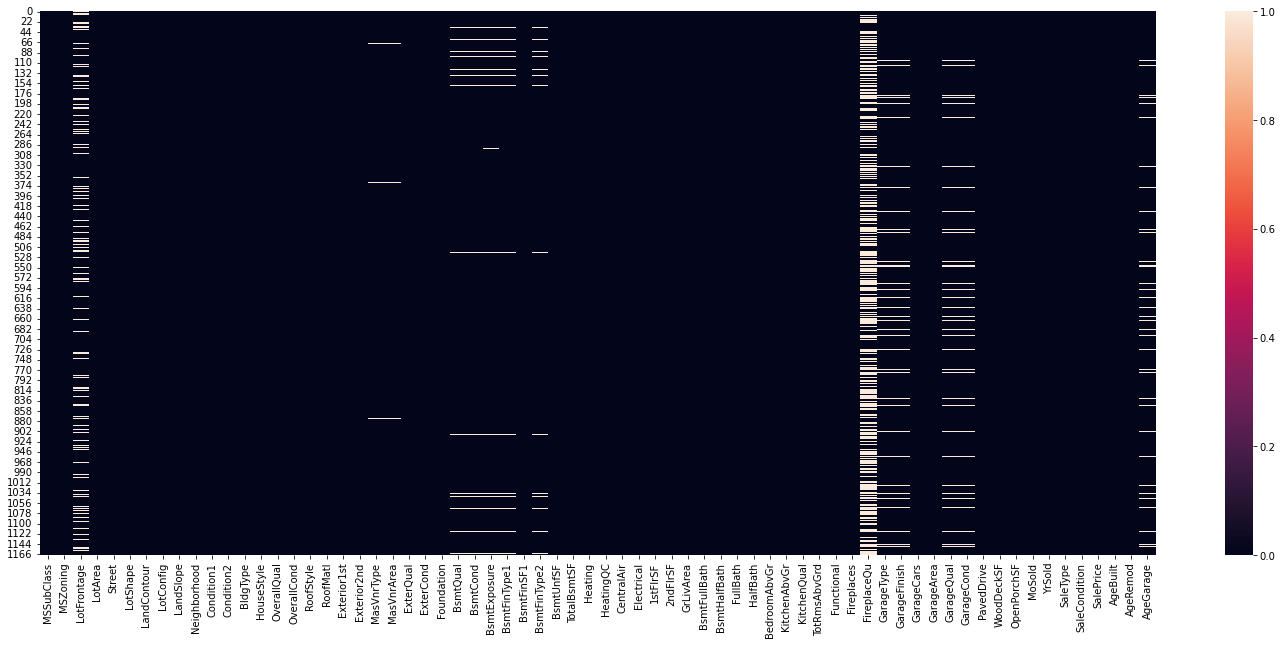

In [348]:
# Let's visualize the null values clearly by the using heat map plot
plt.figure(figsize=(25,10))
sns.heatmap(train.isna())
plt.show()


Now lets treat the null values using different imputing techniques. lets fill the null values with mean in numerical column and lets fill the null values with mode in catagorical columns.

In [349]:
# Filling null values of object data columns with their mode values 
col1=train.columns.values
for i in range(0,len(col1)):
    if train[col1[i]].dtype == "object":
        train[col1[i]].fillna(train[col1[i]].mode()[0], inplace=True)

In [350]:
# Filling null values of numerical columns with their mean values

col2=train.columns.values
for i in range(0,len(col2)):
    if train[col2[i]].dtype != "object":
        train[col2[i]].fillna(train[col2[i]].mean(), inplace=True)

now lets check if the null values are filled by using heatmap

<AxesSubplot:>

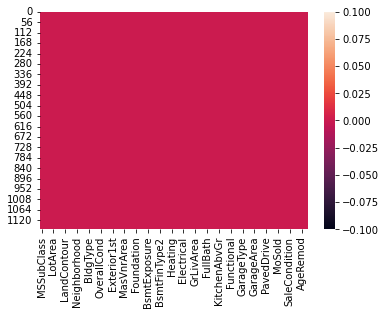

In [351]:
sns.heatmap(train.isna())

We can see that all the null values are filled in all the columns.

Filling the null values in test dataset

In [352]:
# checking for the null values in test dataset

null_values = pd.DataFrame(test[test.columns[test.isnull().any()]].isnull().sum())
null_values.columns=['number of Null Values']
null_values['% of Null Values']=null_values['number of Null Values']/2.92     # 292/100 = 11.68
null_values

number of Null Values  % of Null Values
LotFrontage                      45         15.410959
Alley                           278         95.205479
MasVnrType                        1          0.342466
MasVnrArea                        1          0.342466
BsmtQual                          7          2.397260
BsmtCond                          7          2.397260
BsmtExposure                      7          2.397260
BsmtFinType1                      7          2.397260
BsmtFinType2                      7          2.397260
Electrical                        1          0.342466
FireplaceQu                     139         47.602740
GarageType                       17          5.821918
GarageFinish                     17          5.821918
GarageQual                       17          5.821918
GarageCond                       17          5.821918
PoolQC                          292        100.000000
Fence                           248         84.931507
MiscFeature                     282         96.575342
AgeGarage                        17          5.821918

we can observe that similar to train dataset, the columns PoolQC, MiscFeature, Alley and Fence have null values more than 75% and filing them by using imputation methods would be meaningless as it would affect the accuracy of the model. So lets drop them.

In [353]:
# Dropping the columns containing more than 75% of the null values
test.drop(["PoolQC", "MiscFeature", "Alley", "Fence"],axis=1,inplace=True)

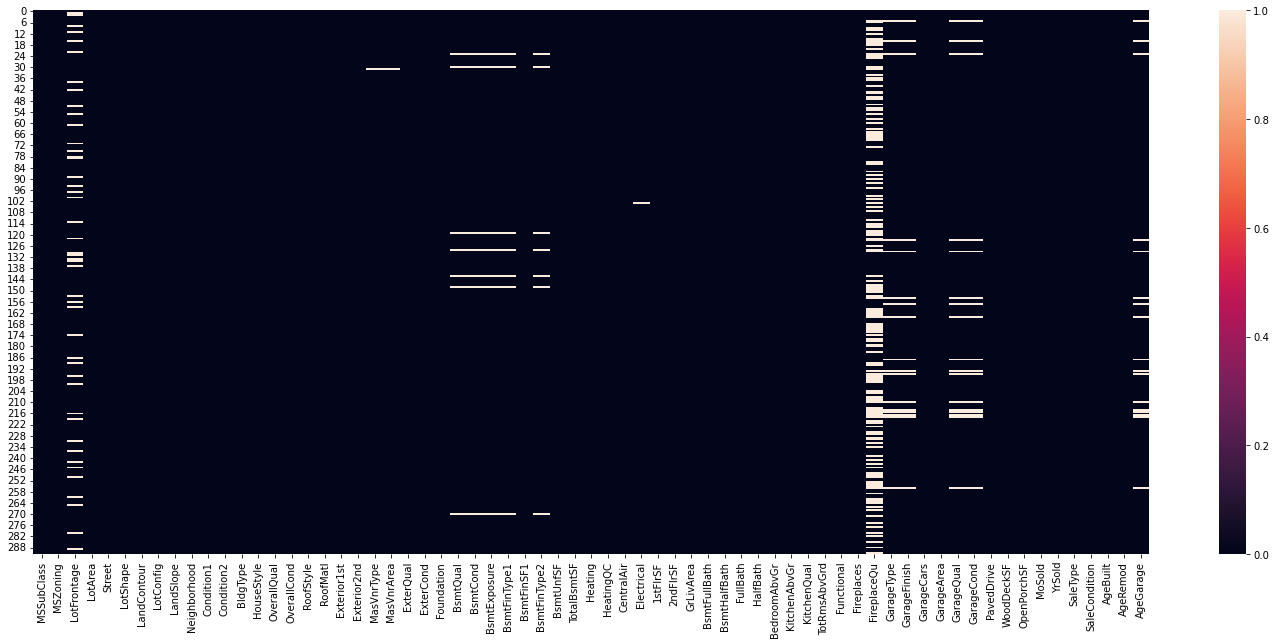

In [354]:
# Let's visualize the null values by using heat map plot
plt.figure(figsize=(25,10))
sns.heatmap(test.isnull())
plt.show()

Now lets treat the null values using different imputing techniques. lets fill the null values with mean in numerical column and lets fill the null values with mode in catagorical columns.

In [355]:
# Filling null values of object data columns with their mode values 
col1=test.columns.values
for i in range(0,len(col1)):
    if test[col1[i]].dtype == "object":
        test[col1[i]].fillna(test[col1[i]].mode()[0], inplace=True)

In [356]:
# Filling null values of numerical columns with their mean values

col2=test.columns.values
for i in range(0,len(col2)):
    if test[col2[i]].dtype != "object":
        test[col2[i]].fillna(test[col2[i]].mean(), inplace=True)

now lets check if the null values are filled by using heatmap

<AxesSubplot:>

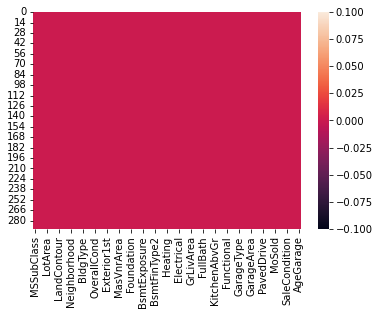

In [357]:
sns.heatmap(test.isna())

All the null values are treated from the test dataset

now lets separate the numerical and categorical columns in both the datasets

In [358]:
#separating the columns for train dataset
# Checking for categorical columns
categorical_coltr=[]
for i in train.dtypes.index:
    if train.dtypes[i]=='object':
        categorical_coltr.append(i)
print(len(categorical_coltr))

# Now checking for numerical columns
numerical_coltr=[]
for i in train.dtypes.index:
    if train.dtypes[i]!='object':
        numerical_coltr.append(i)
print(len(numerical_coltr))

38
30


In [359]:
#separating the columns for train dataset
# Checking for categorical columns
categorical_colte=[]
for i in test.dtypes.index:
    if test.dtypes[i]=='object':
        categorical_colte.append(i)
print(len(categorical_colte))

# Now checking for numerical columns
numerical_colte=[]
for i in test.dtypes.index:
    if test.dtypes[i]!='object':
        numerical_colte.append(i)
print(len(numerical_colte))

38
29


Now lets find out the statistics of both the dataset


In [360]:
# Statistical summary of train dataset
train.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1168.000000  1168.000000    1168.000000  1168.000000  1168.000000   
mean     56.767979    70.988470   10484.749144     6.104452     5.595890   
std      41.940650    22.437056    8957.442311     1.390153     1.124343   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    60.000000    7621.500000     5.000000     5.000000   
50%      50.000000    70.988470    9522.500000     6.000000     5.000000   
75%      70.000000    79.250000   11515.500000     7.000000     6.000000   
max     190.000000   313.000000  164660.000000    10.000000     9.000000   

        MasVnrArea   BsmtFinSF1    BsmtUnfSF  TotalBsmtSF     1stFlrSF  \
count  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean    102.310078   444.726027   569.721747  1061.095034  1169.860445   
std     182.047152   462.664785   449.375525   442.272249   391.161983   
min       0.000000     0.000000     0.000000     0.000000   334.000000   
25%       0.000000     0.000000   216.000000   799.000000   892.000000   
50%       0.000000   385.500000   474.000000  1005.500000  1096.500000   
75%     160.000000   714.500000   816.000000  1291.500000  1392.000000   
max    1600.000000  5644.000000  2336.000000  6110.000000  4692.000000   

          2ndFlrSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count  1168.000000  1168.000000   1168.000000   1168.000000  1168.000000   
mean    348.826199  1525.066781      0.425514      0.055651     1.562500   
std     439.696370   528.042957      0.521615      0.236699     0.551882   
min       0.000000   334.000000      0.000000      0.000000     0.000000   
25%       0.000000  1143.250000      0.000000      0.000000     1.000000   
50%       0.000000  1468.500000      0.000000      0.000000     2.000000   
75%     729.000000  1795.000000      1.000000      0.000000     2.000000   
max    2065.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1168.000000   1168.000000   1168.000000   1168.000000  1168.000000   
mean      0.388699      2.884418      1.045377      6.542808     0.617295   
std       0.504929      0.817229      0.216292      1.598484     0.650575   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF       MoSold  \
count  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean      1.776541   476.860445    96.206336    46.559932     6.344178   
std       0.745554   214.466769   126.158988    66.381023     2.686352   
min       0.000000     0.000000     0.000000     0.000000     1.000000   
25%       1.000000   338.000000     0.000000     0.000000     5.000000   
50%       2.000000   480.000000     0.000000    24.000000     6.000000   
75%       2.000000   576.000000   171.000000    70.000000     8.000000   
max       4.000000  1418.000000   857.000000   547.000000    12.000000   

            YrSold      SalePrice     AgeBuilt     AgeRemod    AgeGarage  
count  1168.000000    1168.000000  1168.000000  1168.000000  1168.000000  
mean   2007.804795  181477.005993    36.874144    23.046233    29.608696  
std       1.329738   79105.586863    30.193130    20.783486    24.247703  
min    2006.000000   34900.000000     0.000000    -1.000000     0.000000  
25%    2007.000000  130375.000000     8.000000     4.000000     7.000000  
50%    2008.000000  163995.000000    36.000000    14.000000    29.608696  
75%    2009.000000  215000.000000    54.000000    42.000000    46.250000  
max    201

Observation from the statistics of the train dataset:

The counts of every column is same which means there are no missing values preent in the dataset.

In some of the columns the mean value is greater than the median(50%), which means they are sjewed to right.

The median(50%) is bit greater than mean in some of the columns so they are skewed to left.

From the description we can say that the mean sales price of the house is around 181477 dollars(say), maximum sale price is 755000 and min is 163995.

By summarizing the data I can notice there is huge difference between maximum value and 75% percentile that leads to large number of outliers present in the dataset.

lets remove these outliers using either Zscore or IQR method.

In [361]:
# Statistical summary of test dataset
test.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  292.000000   292.000000     292.000000   292.000000   292.000000   
mean    57.414384    66.425101   10645.143836     6.078767     5.493151   
std     43.780649    19.975962   13330.669795     1.356147     1.063267   
min     20.000000    21.000000    1526.000000     3.000000     3.000000   
25%     20.000000    57.750000    7200.000000     5.000000     5.000000   
50%     50.000000    66.425101    9200.000000     6.000000     5.000000   
75%     70.000000    76.000000   11658.750000     7.000000     6.000000   
max    190.000000   150.000000  215245.000000    10.000000     9.000000   

        MasVnrArea   BsmtFinSF1    BsmtUnfSF  TotalBsmtSF     1stFlrSF  \
count   292.000000   292.000000   292.000000   292.000000   292.000000   
mean    109.171821   439.294521   557.315068  1042.767123  1133.691781   
std     174.729023   429.559675   411.043768   424.561153   366.941919   
min       0.000000     0.000000     0.000000     0.000000   372.000000   
25%       0.000000     0.000000   255.000000   771.750000   858.000000   
50%       0.000000   369.500000   487.000000   971.000000  1047.500000   
75%     180.000000   700.500000   780.000000  1322.000000  1370.500000   
max    1031.000000  1767.000000  1935.000000  3094.000000  2402.000000   

          2ndFlrSF    GrLivArea  BsmtFullBath  BsmtHalfBath    FullBath  \
count   292.000000   292.000000    292.000000    292.000000  292.000000   
mean    339.657534  1477.051370      0.424658      0.065068    1.575342   
std     424.278825   514.199429      0.508831      0.247070    0.547856   
min       0.000000   520.000000      0.000000      0.000000    0.000000   
25%       0.000000  1061.500000      0.000000      0.000000    1.000000   
50%       0.000000  1440.000000      0.000000      0.000000    2.000000   
75%     717.000000  1720.250000      1.000000      0.000000    2.000000   
max    1589.000000  3447.000000      2.000000      1.000000    3.000000   

         HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
count  292.000000    292.000000     292.00000    292.000000  292.000000   
mean     0.359589      2.794521       1.05137      6.417808    0.595890   
std      0.494795      0.807336       0.23616      1.728105    0.621259   
min      0.000000      0.000000       1.00000      3.000000    0.000000   
25%      0.000000      2.000000       1.00000      5.000000    0.000000   
50%      0.000000      3.000000       1.00000      6.000000    1.000000   
75%      1.000000      3.000000       1.00000      7.000000    1.000000   
max      2.000000      6.000000       3.00000     12.000000    2.000000   

       GarageCars   GarageArea  WoodDeckSF  OpenPorchSF      MoSold  \
count  292.000000   292.000000  292.000000   292.000000  292.000000   
mean     1.729452   457.458904   86.397260    47.061644    6.232877   
std      0.754430   210.785591  121.898836    65.865449    2.774556   
min      0.000000     0.000000    0.000000     0.000000    1.000000   
25%      1.000000   300.000000    0.000000     0.000000    4.000000   
50%      2.000000   467.500000    0.000000    28.500000    6.000000   
75%      2.000000   569.750000  149.250000    66.000000    8.000000   
max      4.000000  1052.000000  728.000000   418.000000   12.000000   

            YrSold    AgeBuilt    AgeRemod   AgeGarage  
count   292.000000  292.000000  292.000000  292.000000  
mean   2007.859589   35.243151   22.565068   28.090909  
std       1.322867   30.494309   20.089470   23.145196  
min    2006.000000    0.000000    0.000000    0.000000  
25%    2007.000000    6.750000    4.000000    6.000000  
50%    2008.000000   32.000000   14.000000   28.090909  
75%    2009.000000   53.250000   39.250000   42.000000  
max    2010.000000  136.000000   60.000000   90.000000

# Data Visualization

We will only consider the train dataset for visualization.

Pie plot for the column: Street
Pave    1164
Grvl       4
Name: Street, dtype: int64


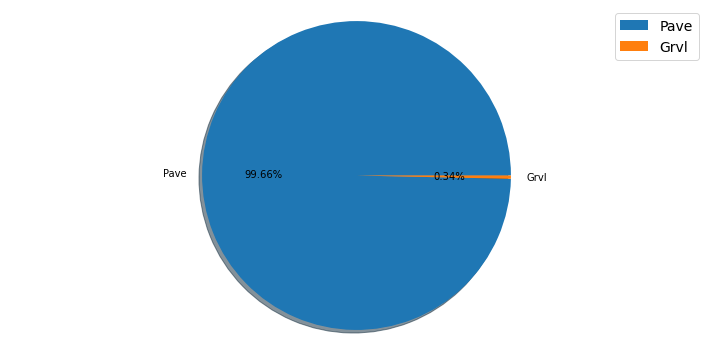

*****************************************************************************************************************************
Pie plot for the column: LotShape
Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64


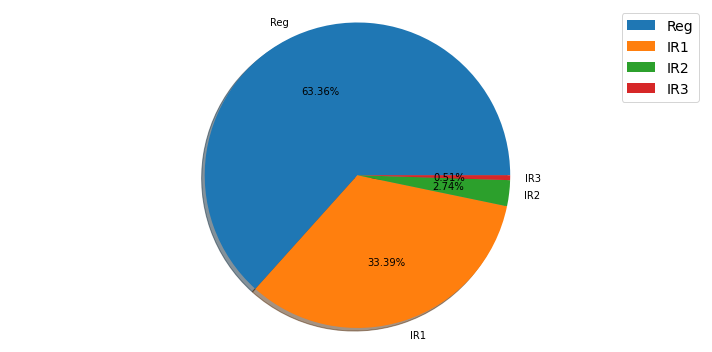

*****************************************************************************************************************************
Pie plot for the column: LandContour
Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64


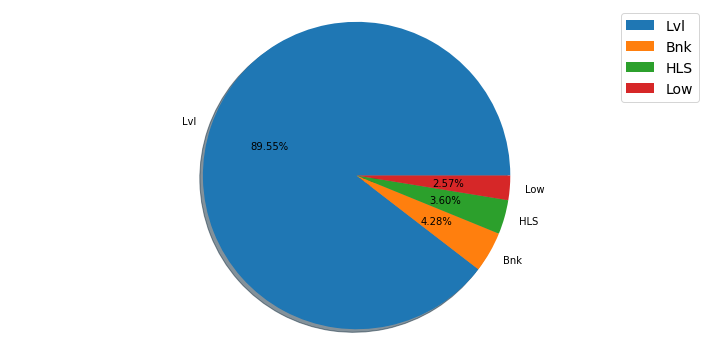

*****************************************************************************************************************************
Pie plot for the column: LandSlope
Gtl    1105
Mod      51
Sev      12
Name: LandSlope, dtype: int64


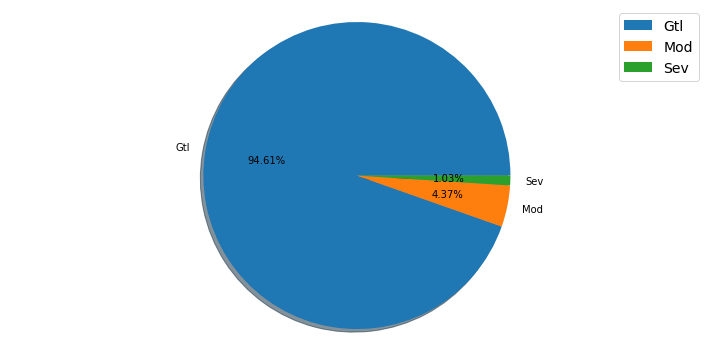

*****************************************************************************************************************************
Pie plot for the column: MasVnrType
None       703
BrkFace    354
Stone       98
BrkCmn      13
Name: MasVnrType, dtype: int64


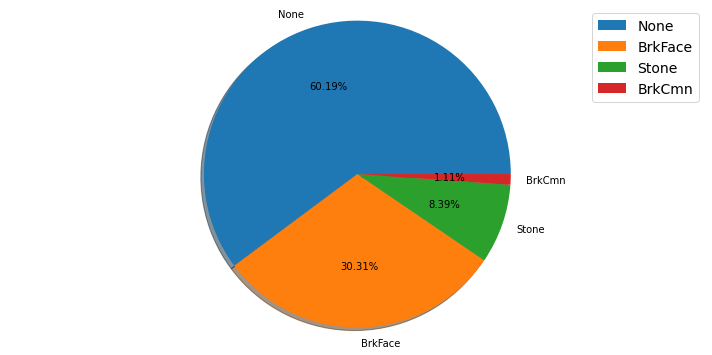

*****************************************************************************************************************************
Pie plot for the column: ExterQual
TA    717
Gd    397
Ex     43
Fa     11
Name: ExterQual, dtype: int64


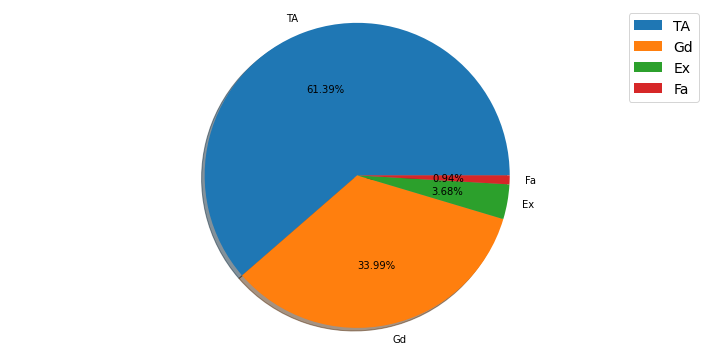

*****************************************************************************************************************************
Pie plot for the column: BsmtQual
TA    547
Gd    498
Ex     94
Fa     29
Name: BsmtQual, dtype: int64


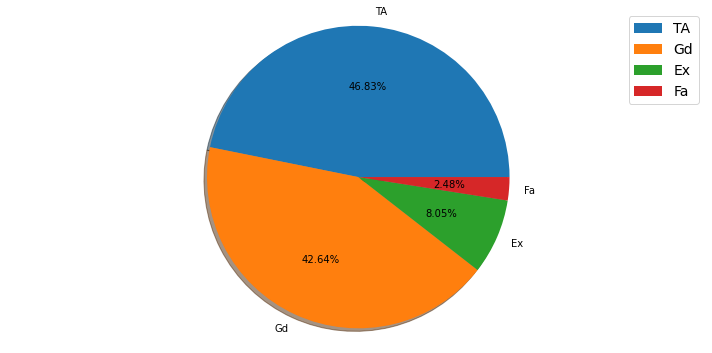

*****************************************************************************************************************************
Pie plot for the column: BsmtCond
TA    1071
Gd      56
Fa      39
Po       2
Name: BsmtCond, dtype: int64


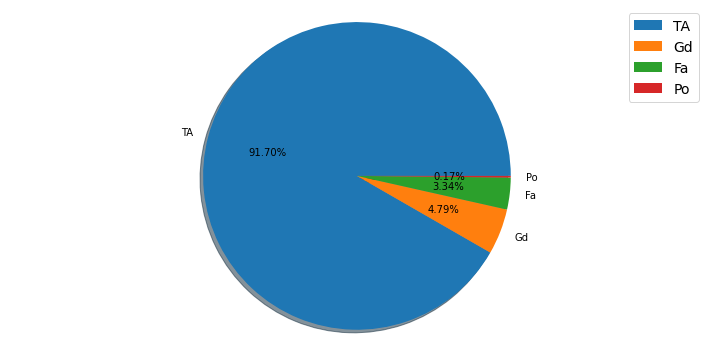

*****************************************************************************************************************************
Pie plot for the column: BsmtExposure
No    787
Av    180
Gd    108
Mn     93
Name: BsmtExposure, dtype: int64


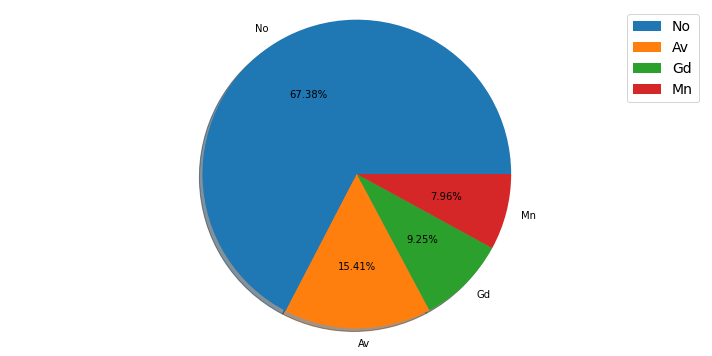

*****************************************************************************************************************************
Pie plot for the column: CentralAir
Y    1090
N      78
Name: CentralAir, dtype: int64


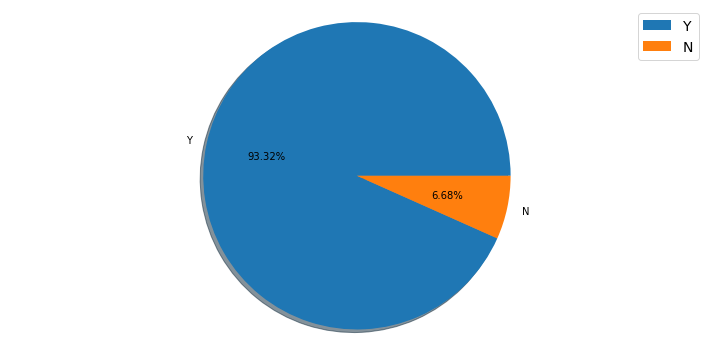

*****************************************************************************************************************************
Pie plot for the column: KitchenQual
TA    578
Gd    478
Ex     82
Fa     30
Name: KitchenQual, dtype: int64


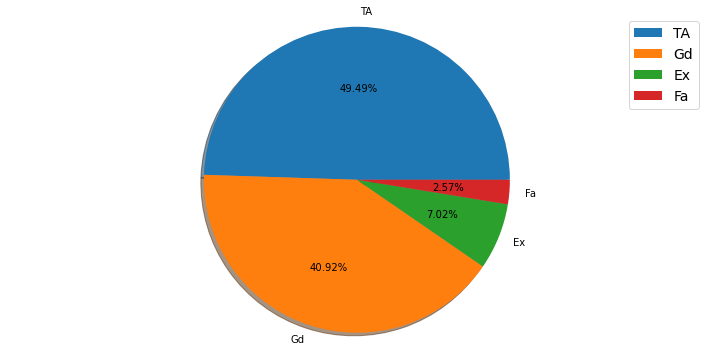

*****************************************************************************************************************************
Pie plot for the column: GarageFinish
Unf    551
RFn    339
Fin    278
Name: GarageFinish, dtype: int64


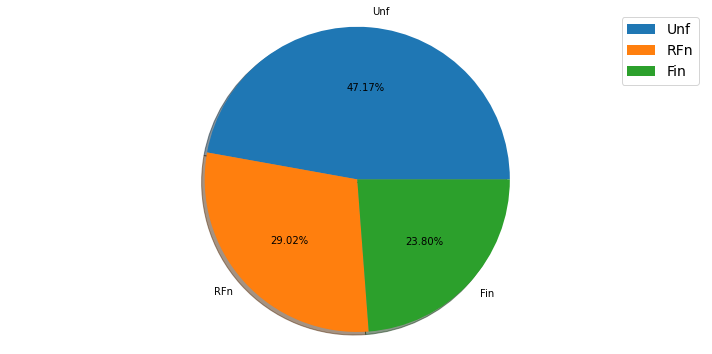

*****************************************************************************************************************************
Pie plot for the column: PavedDrive
Y    1071
N      74
P      23
Name: PavedDrive, dtype: int64


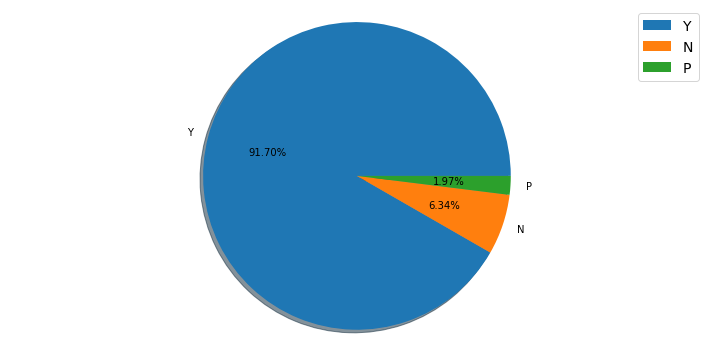

*****************************************************************************************************************************


In [362]:
def generate_pie(i):
    plt.figure(figsize=(10,5))
    plt.pie(i.value_counts(), labels=i.value_counts().index, autopct='%1.2f%%',shadow=True,)
    plt.legend(prop={'size':14})
    plt.axis('equal')
    plt.tight_layout()
    return plt.show()

cols1 = ['Street', 'LotShape','LandContour','LandSlope', 'MasVnrType','ExterQual','BsmtQual','BsmtCond','BsmtExposure','CentralAir','KitchenQual','GarageFinish','PavedDrive']

plotnumber=1
for j in train[cols1]:
    print(f"Pie plot for the column:", j)
    print(train[j].value_counts())
    generate_pie(train[j])
    print("*"*125)

Observations from the pie plots

The count of road access to the property Paved is 1164 which covers around 99.66% of the property where Graved type has count 4 that is only 0.34%.

The count is high for the property having the shape regular.

The total number of flatness of the property for level is high which has 89.55%.

The slope of the property Gentle slope has very high count of 1105 i.e, 94.61%.

Around 60% of the houses does not have Masonry veneer type and 30% of the houses contains Brick Face type of Masonry veneer.

Around 61% of the houses evaluates typical/average quality of the material on the exterior, 34% of the houses have good quality of the material on the exterior. Only a few have excellent quality.

Most of the houses evaluates typical/average and good quality of height of the basement.

Around 91% of the houses have typical/average condition of the basement.

Around 67% of the houses does not contain any walkout or garden level walls.

93.32% of the houses have central air conditioning.

49% of the houses contains typical/average kitchen quality and 40% of the houses have good kutchen quality. The count for excellent kitchen quality is very low and is around 2%.

47% Of the houses have unfinished garage interior, 29% rough finished and only 23% of the houses' interior garage has finished.

91.70% of the houses contains the paved drive way.

Lets visualize the remaining nominal data with countplots.

In [363]:
def value_count(column):
    counts=len(train[column].value_counts())
    if counts<3:
        plt.figure(figsize=(8,5))
    elif counts<5:
        plt.figure(figsize=(8,5))
        plt.xticks(rotation=90)
    elif counts<10:
        plt.figure(figsize=(10,6))
        plt.xticks(rotation=90)
    else:
        plt.figure(figsize=(10,8))
        plt.xticks(rotation=90)
    sns.countplot(x=column,data=train,palette="Dark2")
    plt.show()
    print("*"*125)

RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64


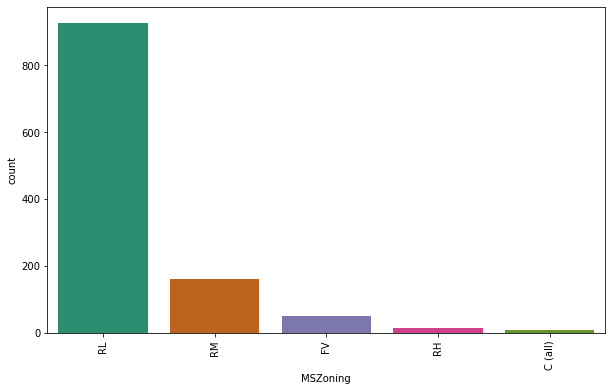

*****************************************************************************************************************************
Inside     842
Corner     222
CulDSac     69
FR2         33
FR3          2
Name: LotConfig, dtype: int64


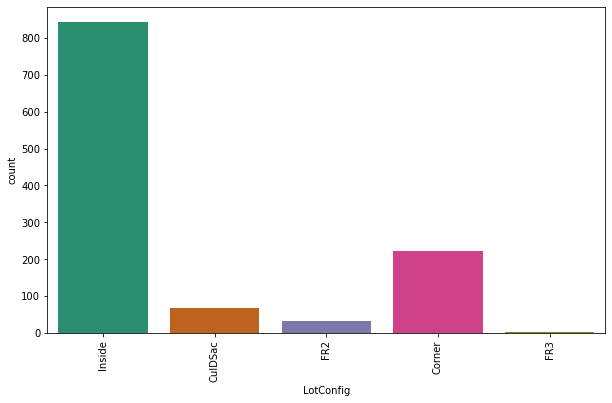

*****************************************************************************************************************************
NAmes      182
CollgCr    118
OldTown     86
Edwards     83
Somerst     68
Gilbert     64
NridgHt     61
Sawyer      60
NWAmes      59
SawyerW     51
BrkSide     50
Crawfor     45
NoRidge     35
Mitchel     34
IDOTRR      30
Timber      24
ClearCr     24
SWISU       21
StoneBr     19
Blmngtn     15
BrDale      11
MeadowV      9
Veenker      9
NPkVill      8
Blueste      2
Name: Neighborhood, dtype: int64


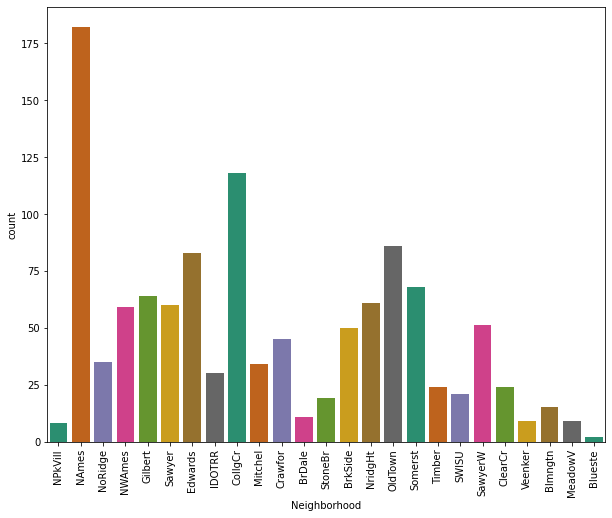

*****************************************************************************************************************************
Norm      1005
Feedr       67
Artery      38
RRAn        20
PosN        17
RRAe         9
PosA         6
RRNn         4
RRNe         2
Name: Condition1, dtype: int64


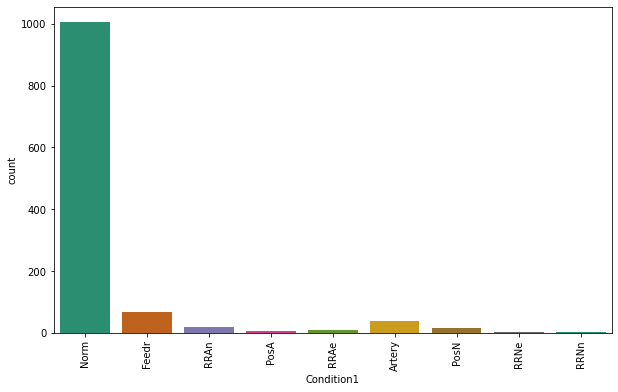

*****************************************************************************************************************************
Norm      1154
Feedr        6
PosN         2
Artery       2
RRAe         1
RRNn         1
PosA         1
RRAn         1
Name: Condition2, dtype: int64


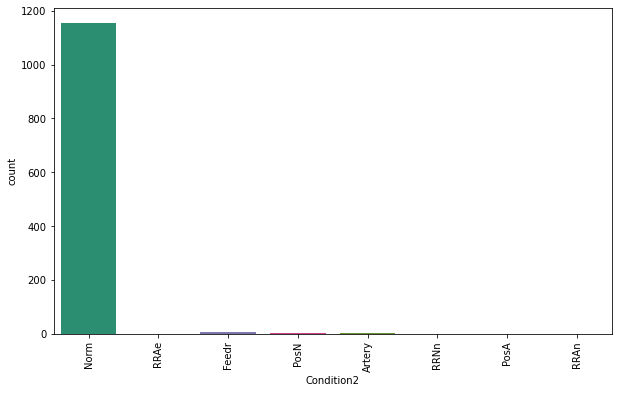

*****************************************************************************************************************************
1Fam      981
TwnhsE     90
Duplex     41
Twnhs      29
2fmCon     27
Name: BldgType, dtype: int64


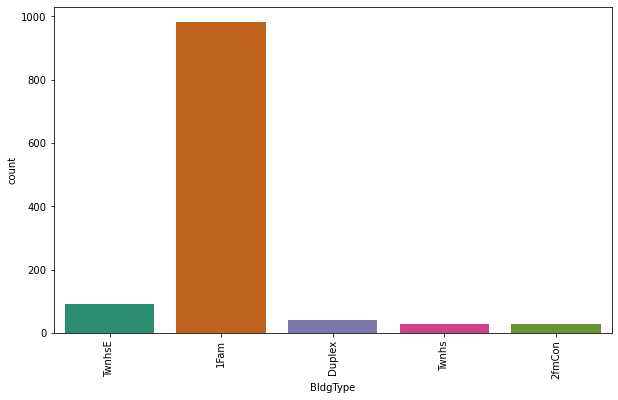

*****************************************************************************************************************************
1Story    578
2Story    361
1.5Fin    121
SLvl       47
SFoyer     32
1.5Unf     12
2.5Unf     10
2.5Fin      7
Name: HouseStyle, dtype: int64


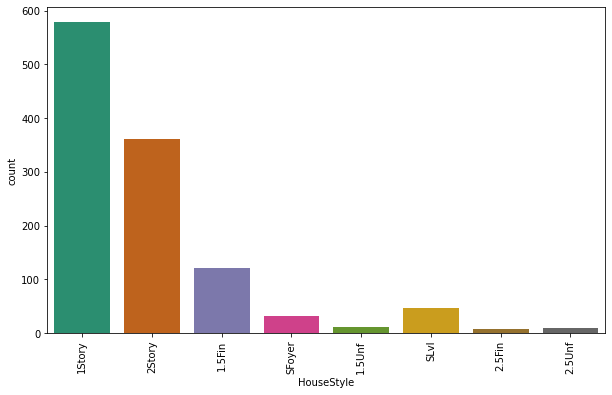

*****************************************************************************************************************************
Gable      915
Hip        225
Flat        12
Gambrel      9
Mansard      5
Shed         2
Name: RoofStyle, dtype: int64


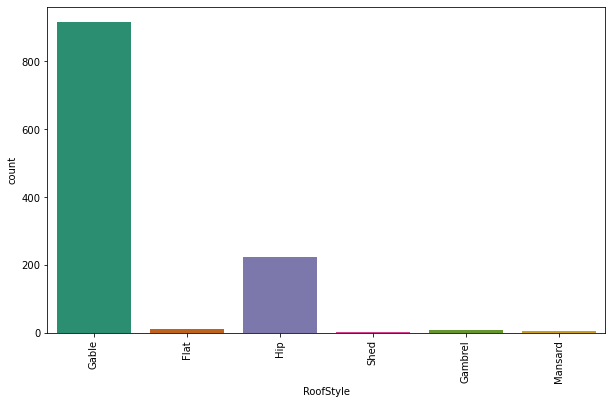

*****************************************************************************************************************************
CompShg    1144
Tar&Grv      10
WdShngl       6
WdShake       4
Roll          1
ClyTile       1
Metal         1
Membran       1
Name: RoofMatl, dtype: int64


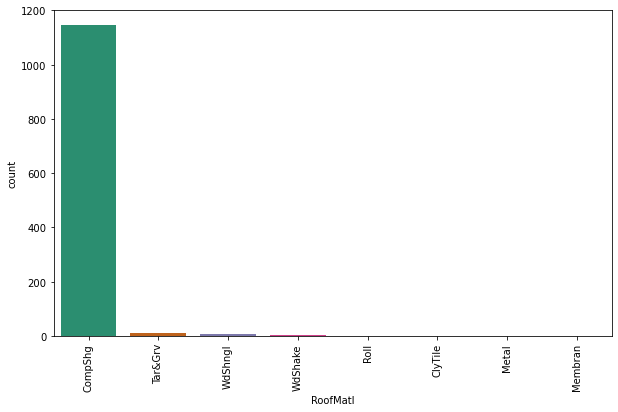

*****************************************************************************************************************************
VinylSd    396
HdBoard    179
MetalSd    178
Wd Sdng    174
Plywood     93
CemntBd     42
BrkFace     41
Stucco      22
WdShing     19
AsbShng     19
Stone        2
AsphShn      1
ImStucc      1
BrkComm      1
Name: Exterior1st, dtype: int64


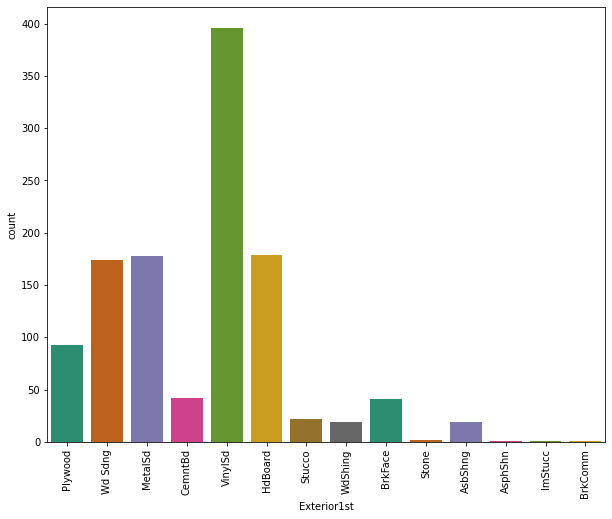

*****************************************************************************************************************************
VinylSd    387
MetalSd    173
HdBoard    170
Wd Sdng    165
Plywood    118
CmentBd     42
Wd Shng     31
Stucco      23
BrkFace     20
AsbShng     18
ImStucc      8
Brk Cmn      5
Stone        4
AsphShn      3
Other        1
Name: Exterior2nd, dtype: int64


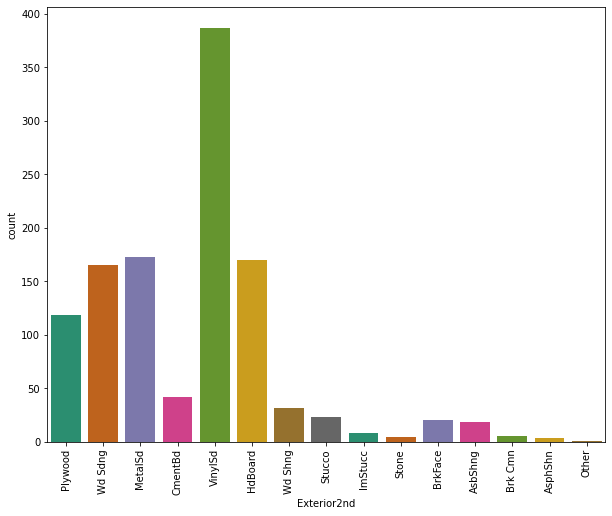

*****************************************************************************************************************************
TA    1022
Gd     117
Fa      26
Ex       2
Po       1
Name: ExterCond, dtype: int64


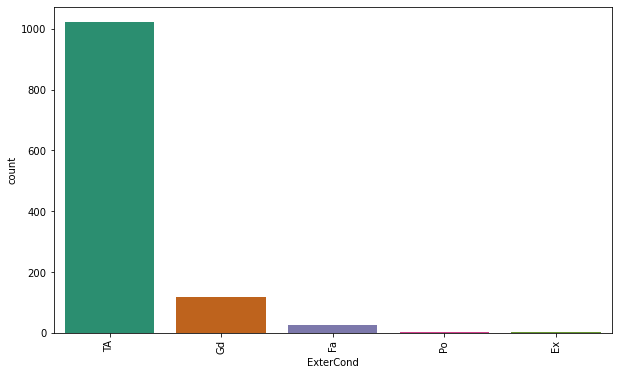

*****************************************************************************************************************************
CBlock    516
PConc     513
BrkTil    112
Slab       21
Stone       5
Wood        1
Name: Foundation, dtype: int64


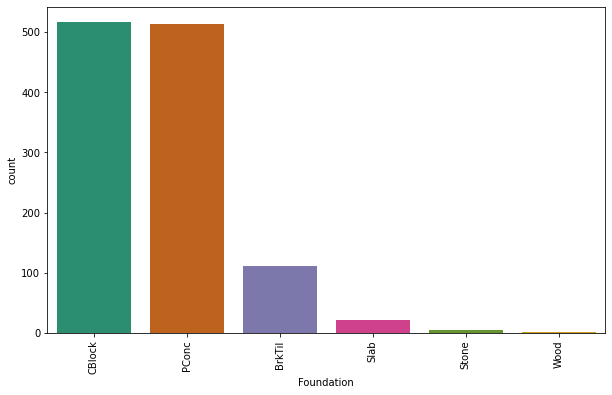

*****************************************************************************************************************************
Unf    375
GLQ    330
ALQ    174
BLQ    121
Rec    109
LwQ     59
Name: BsmtFinType1, dtype: int64


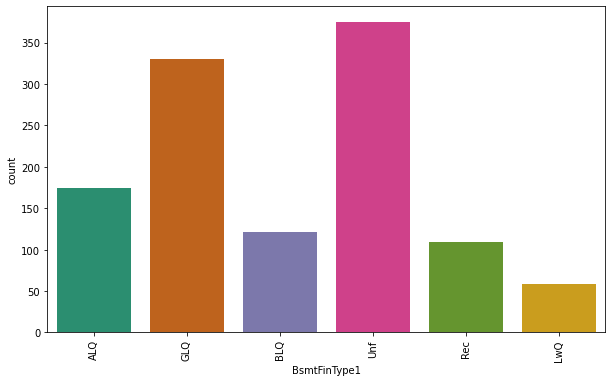

*****************************************************************************************************************************
Unf    1033
Rec      43
LwQ      40
BLQ      24
ALQ      16
GLQ      12
Name: BsmtFinType2, dtype: int64


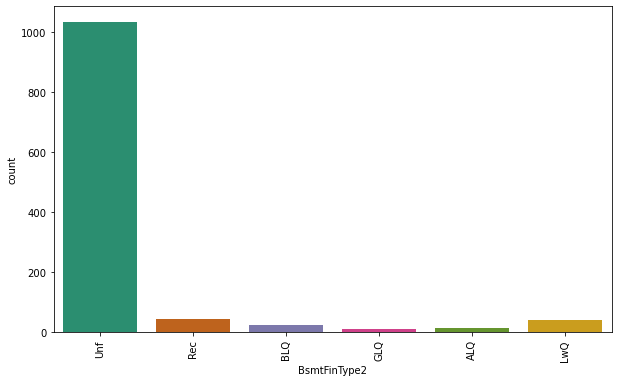

*****************************************************************************************************************************
GasA     1143
GasW       14
Grav        5
Wall        4
Floor       1
OthW        1
Name: Heating, dtype: int64


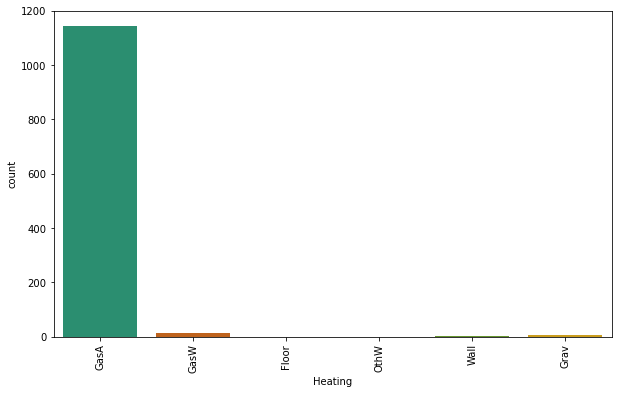

*****************************************************************************************************************************
Ex    585
TA    352
Gd    192
Fa     38
Po      1
Name: HeatingQC, dtype: int64


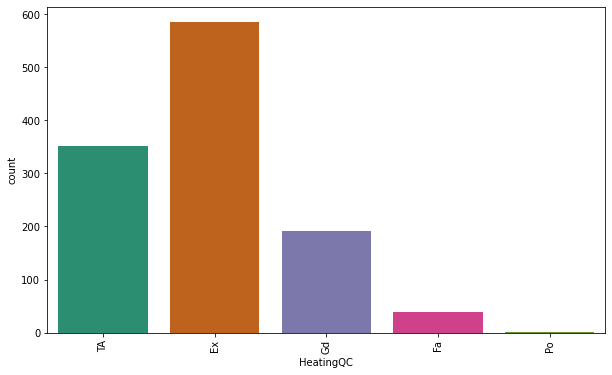

*****************************************************************************************************************************
SBrkr    1070
FuseA      74
FuseF      21
FuseP       2
Mix         1
Name: Electrical, dtype: int64


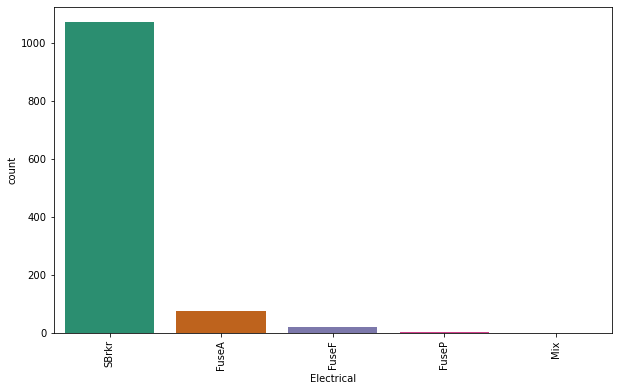

*****************************************************************************************************************************
Typ     1085
Min2      30
Min1      25
Mod       12
Maj1      11
Maj2       4
Sev        1
Name: Functional, dtype: int64


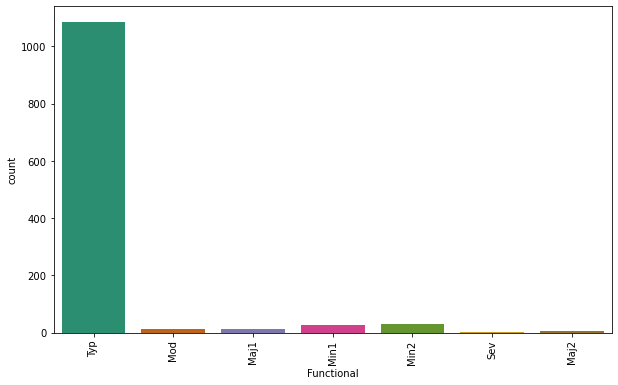

*****************************************************************************************************************************
Gd    852
TA    252
Fa     25
Ex     21
Po     18
Name: FireplaceQu, dtype: int64


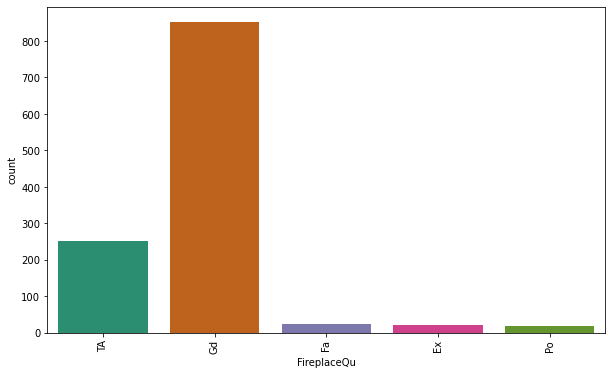

*****************************************************************************************************************************
Attchd     755
Detchd     314
BuiltIn     70
Basment     16
CarPort      8
2Types       5
Name: GarageType, dtype: int64


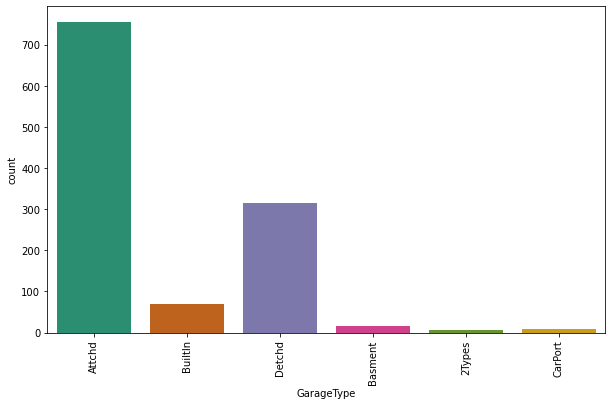

*****************************************************************************************************************************
TA    1114
Fa      39
Gd      11
Ex       2
Po       2
Name: GarageQual, dtype: int64


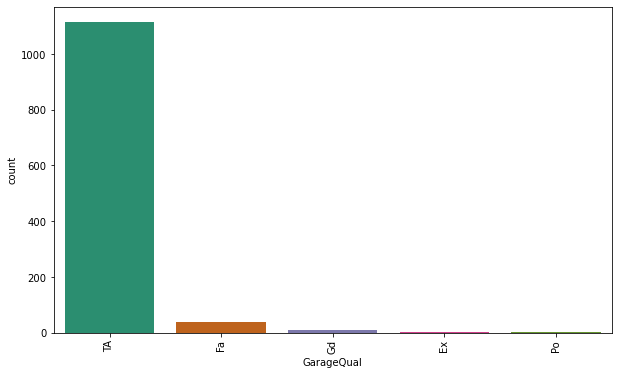

*****************************************************************************************************************************
TA    1125
Fa      28
Gd       8
Po       6
Ex       1
Name: GarageCond, dtype: int64


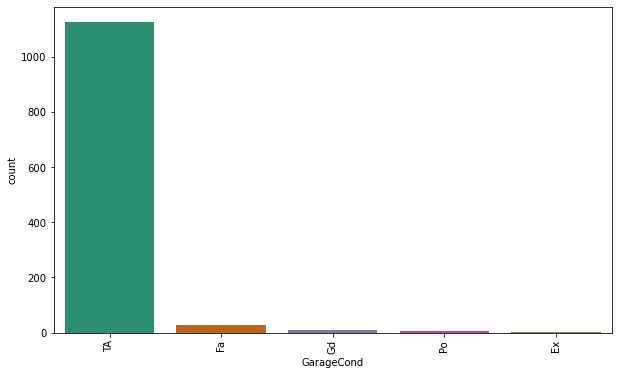

*****************************************************************************************************************************
WD       999
New      106
COD       38
ConLD      8
ConLI      5
ConLw      4
Oth        3
CWD        3
Con        2
Name: SaleType, dtype: int64


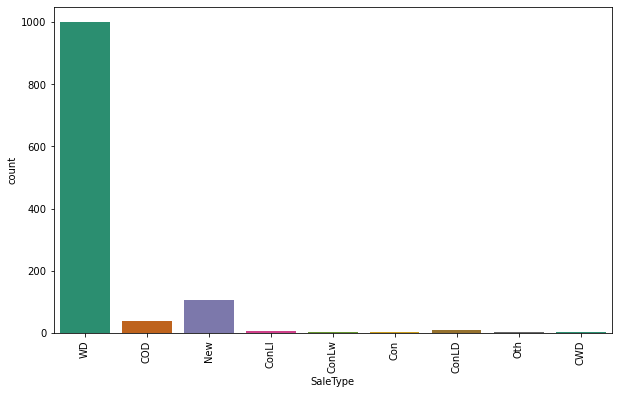

*****************************************************************************************************************************
Normal     945
Partial    108
Abnorml     81
Family      18
Alloca      12
AdjLand      4
Name: SaleCondition, dtype: int64


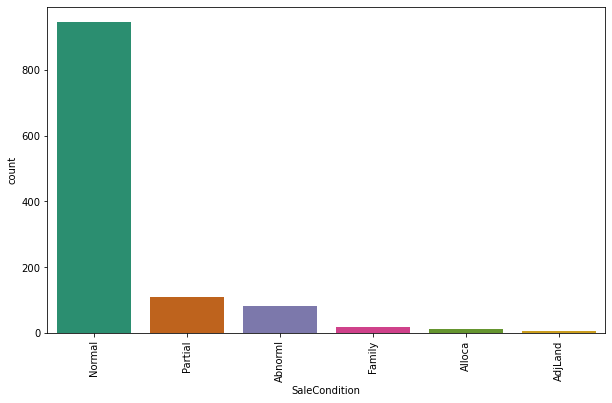

*****************************************************************************************************************************


In [364]:
df1 = train[['MSZoning','LotConfig',  'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',  'ExterCond', 'Foundation','BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',  'Electrical',  'Functional', 'FireplaceQu', 'GarageType',  'GarageQual', 'GarageCond', 'SaleType', 'SaleCondition']]
for i in df1:
    print(df1[i].value_counts())
    value_count(i)

Observations from the count plots

The houses having Residential Low Density zoning of the sale have high count and commercial zoning sale have very less count compared to others.

Inside lot configiration has high count and Frontage on 3 sides of property have very less count compared to others.

The count is high for the North Ames cities floowed by college creek and count is very low for Bluestem.

The count is high for the Normal proximity condition apart from this all the others have very less count.

Similar to condition1, in comdition2 also Normal proximity has very high count compared to others.

Single-family detached dwelling type has very high counts compared to other types have very less count.

1 story style of dwelling has high count followed by 2 story and others have very less count.

The flat type roof has high count and shed has very less count.

The roof material type Standard (Composite) Shingle has highest count and others have very less counts.

Most of the houses have Vinyl Siding exterior covering materials followed by hard board also Brick Common, Asphalt Shingles and Imitation Stucco have very count which means there are no more houses with these types.

Similar to Exterior1st, here also most of the houses have Vinyl Siding exterior covering materials.

The present condition of the material on the exterior for most of the houses are Average/Typical.

Most of the houses have Cinder Block and Poured Contrete type of foundation.

The count is high for the houses having unfinished basement area. Also some houses have Good Living Quarters.

Similar to BsmtFinType1, here also the count is high for unfinished basements.

Most of the houses have Gas forced warm air furnace heating type.

Most of the houses have excellent heating quality and condition also some houses have typical/average HeatingQC and only 1% of the houses have poor heating quality and condition.

The electrical system of the type Standard Circuit Breakers & Romex has very high count which means most of the houses have this facility.

The total number of home functionality of the property for typical functionality have high count compared to others.

The houses with Masonry Fireplace in main level have good quality compared ot others.

The garage location attachec to home has high count also the garage locations detached to home have moderate level of counts. Only few houses have car port and more than one type of garage.

Houses with typical/average garage quality have high count compared to others.

Houses with typical/average garage condition have high count compared to others.

Warranty Deed type of sale has high count followed by Home just constructed and sold(new).

Mormal sale has high count also the home which was not completed when last assessed also has average sale condition.

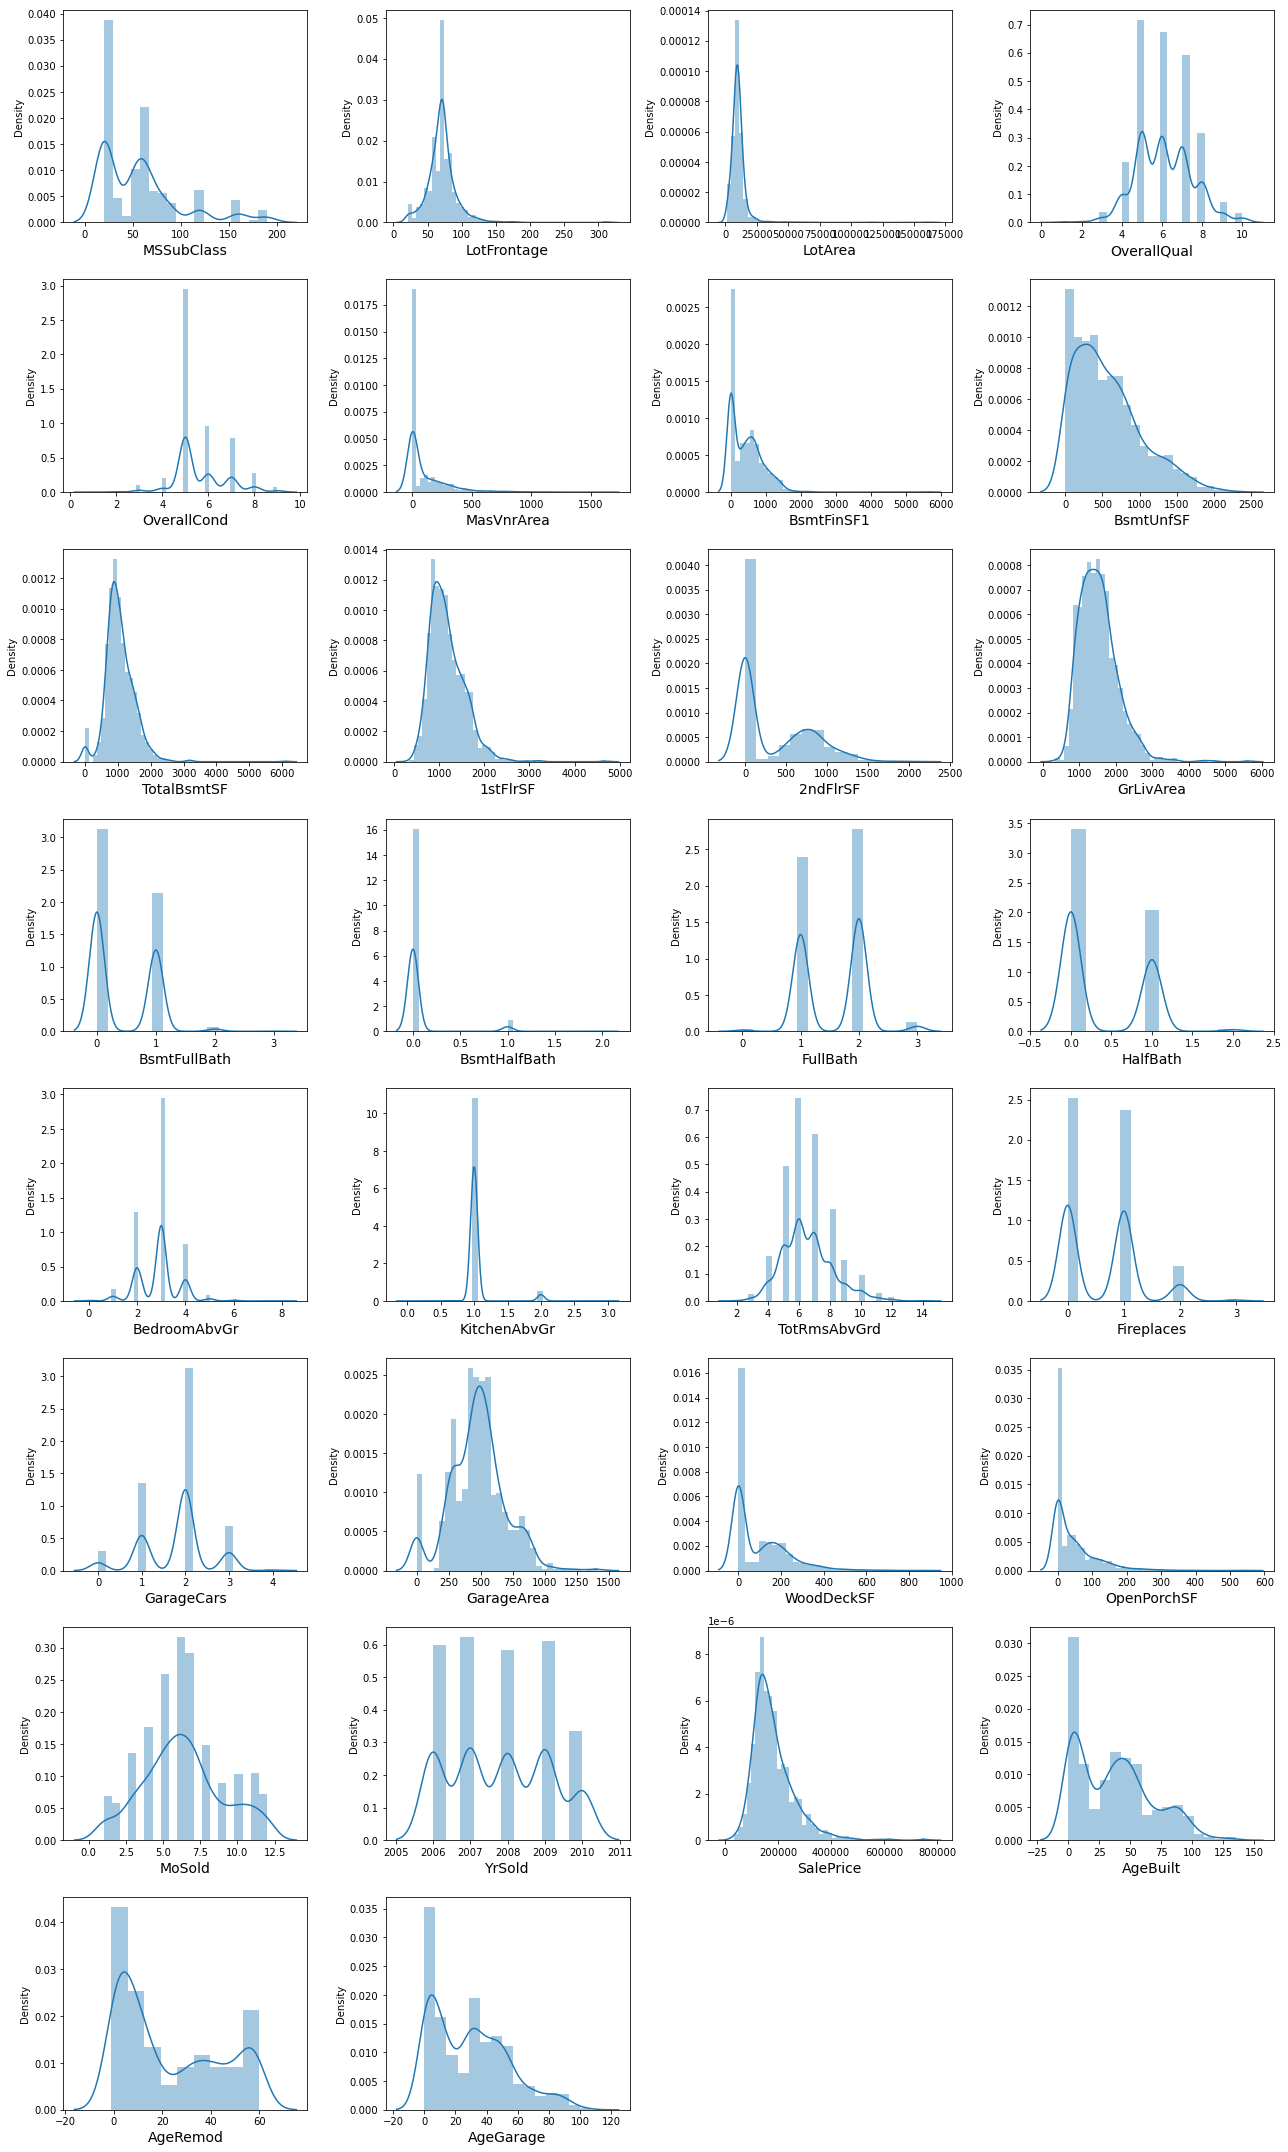

In [365]:
# now the data looks good and there is no missing values and Object values so we can start visualizing the type of distribution for each feature
# we will only evaluate the type of distribution for features having continious data here

plt.figure(figsize=(18,30),facecolor='white')
plotnumber=1

for column in numerical_coltr:
    if plotnumber<=30:
        ax=plt.subplot(8,4,plotnumber)
        sns.distplot(train[column])
        plt.xlabel(column,fontsize=14)
    
    plotnumber+=1
plt.tight_layout()

observations from the distplots:

From the above distribution plot we can observe most of the columns are not normally distributed only some of the columns are almost distributed normally.

Almost all the columns have skewness and are skewed to right. We need to remove this skewness before building our machine learning models.

Now lets identify the outliers in both test and train dataset

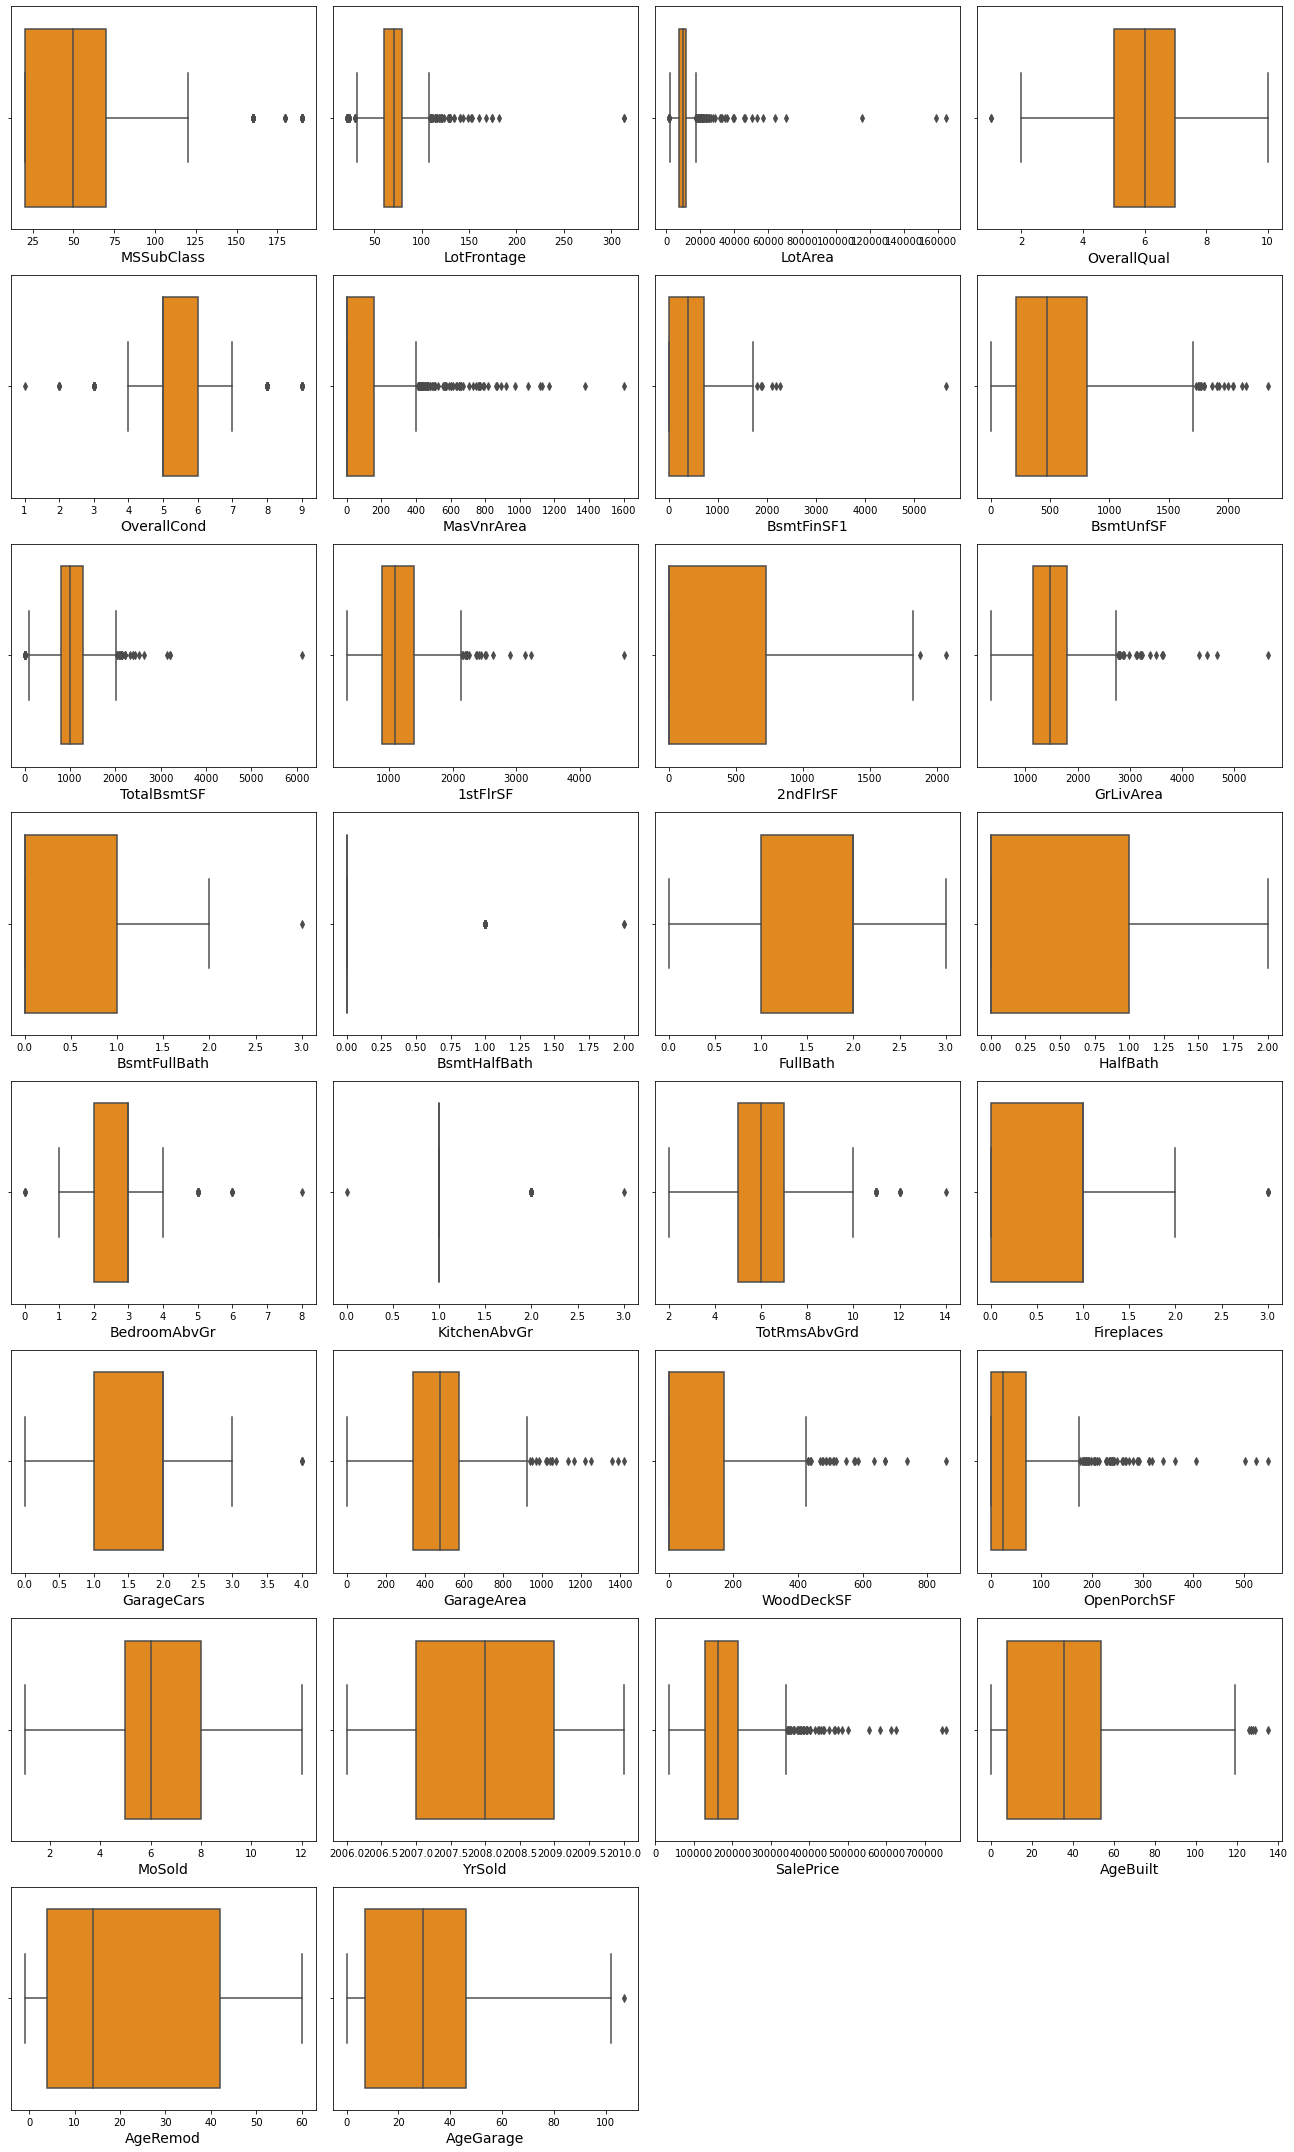

In [366]:
# Identifying the outliers using boxplot
plt.figure(figsize=(18,30))
plotnumber=1
for column in numerical_coltr:
    if plotnumber<=30:
        ax=plt.subplot(8,4,plotnumber)
        sns.boxplot(train[column],color="darkorange")
        plt.xlabel(column,fontsize=14)
    plotnumber+=1
plt.tight_layout()

We can clearly observe outliers in many columns so lets remove them by percentile method.

In [367]:
#removing the outliers in train dataset

# Feature containing outliers
features_tr = train[['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'AgeBuilt', 'AgeGarage']]

# Removing outliers in train data using percentile method 

for col in features_tr:
    if train[col].dtypes != 'object':
        percentile = train[col].quantile([0.01,0.98]).values
        train[col][train[col]<=percentile[0]]=percentile[0]
        train[col][train[col]>=percentile[1]]=percentile[1]

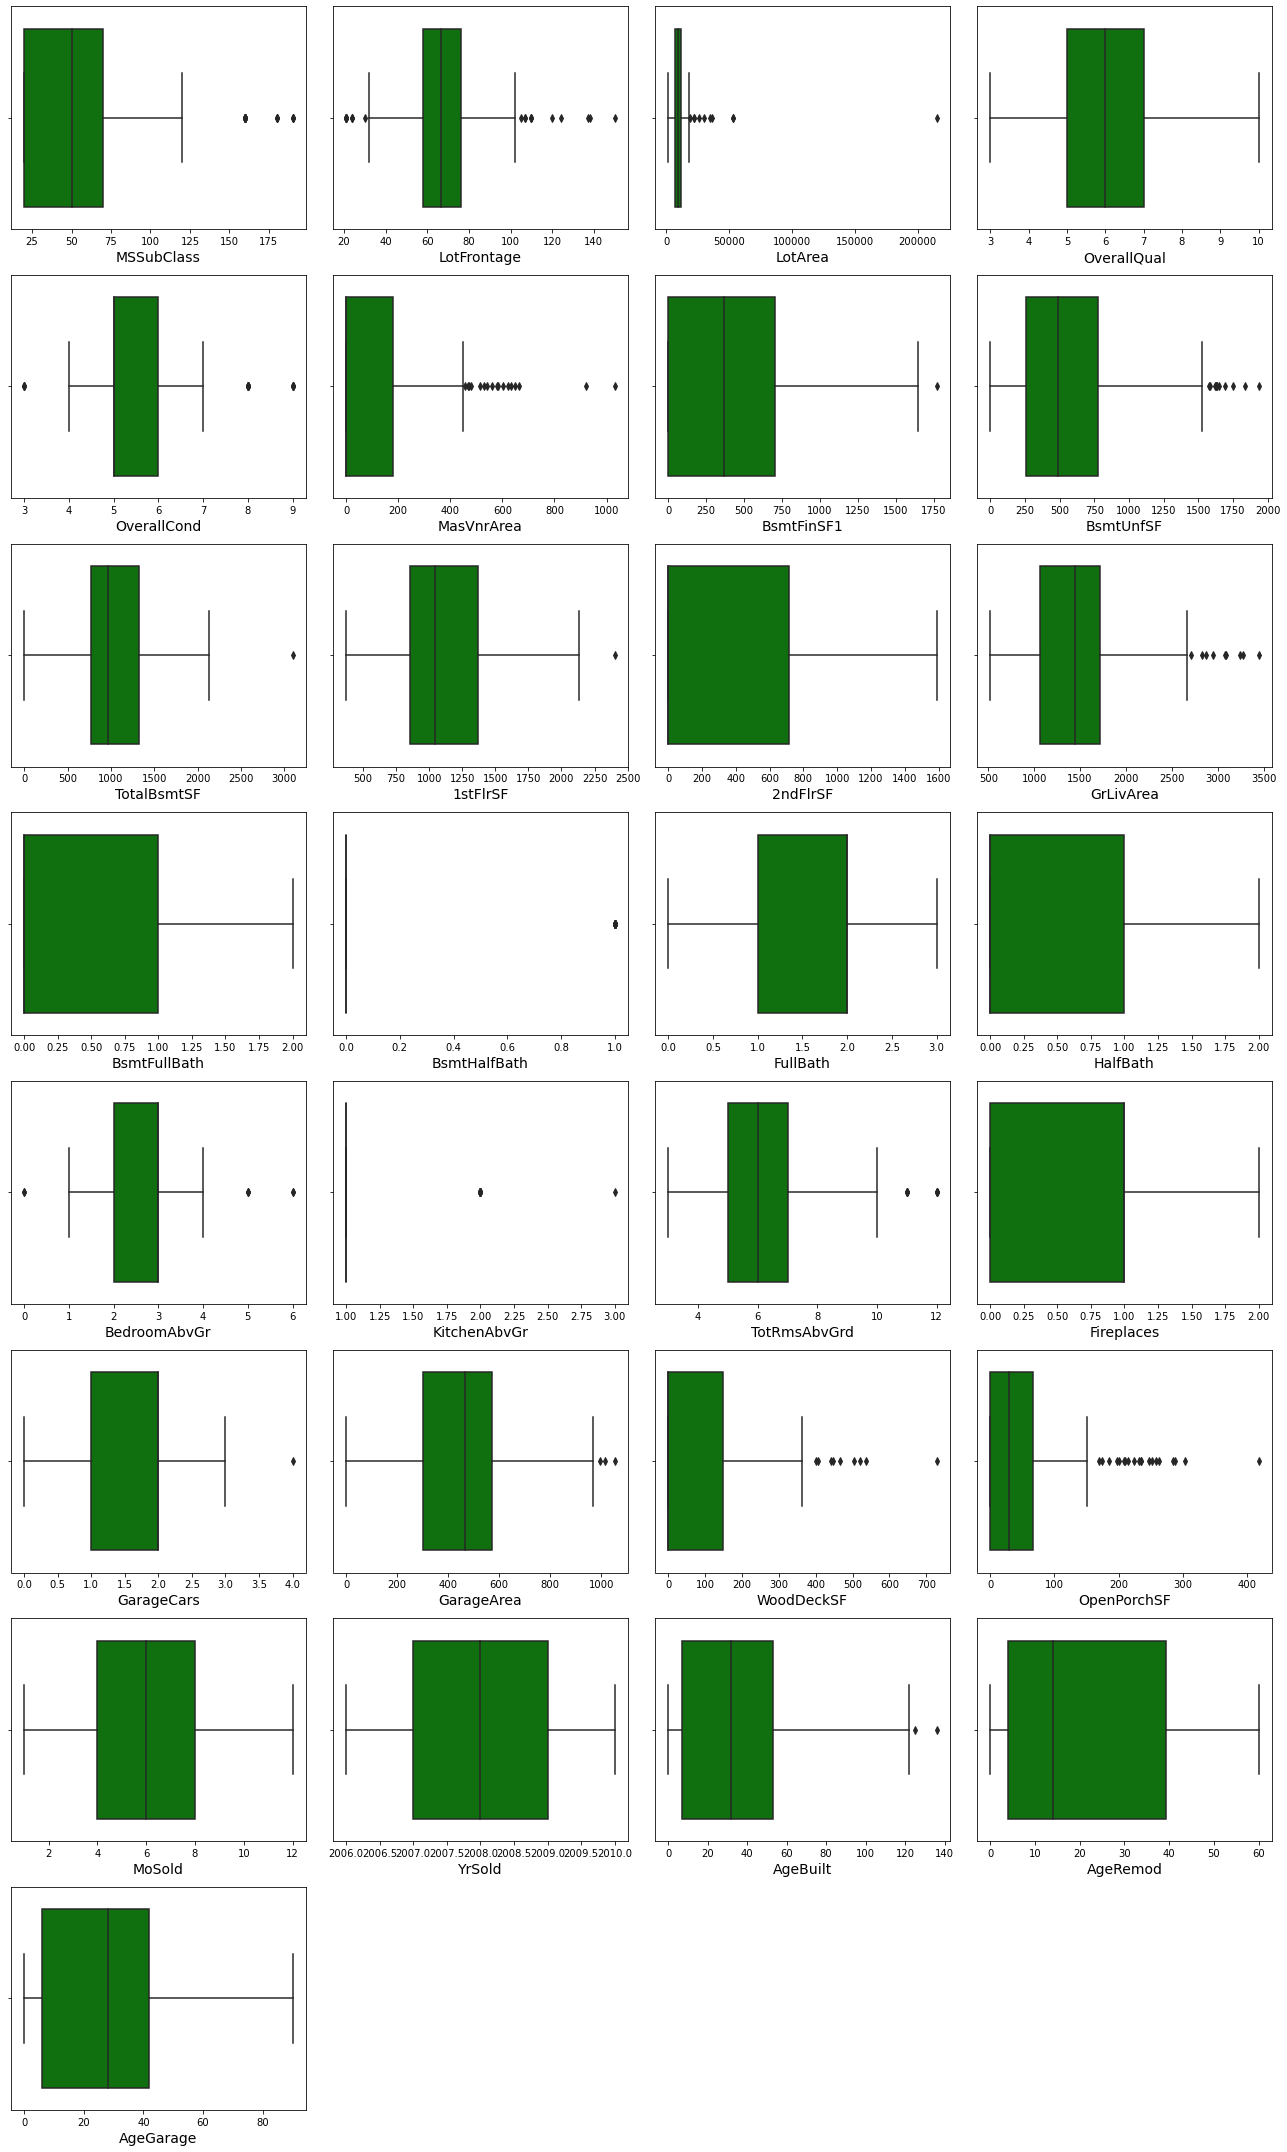

In [368]:
# Identifying the outliers using boxplot
plt.figure(figsize=(18,30),facecolor='white')
plotnumber=1
for column in numerical_colte:
    if plotnumber<=30:
        ax=plt.subplot(8,4,plotnumber)
        sns.boxplot(test[column],color="g")
        plt.xlabel(column,fontsize=14)
    plotnumber+=1
plt.tight_layout()

We can clearly observe outliers in many columns lets remove them by usine percentile method.

In [369]:
# Feature containing outliers
features_te = test[['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'BsmtHalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'AgeBuilt']]




# Removing outliers in test dataset using percentile method 
for col1 in features_te:
    if test[col1].dtypes != 'object':
        percentile = test[col1].quantile([0.01,0.98]).values
        test[col1][test[col1]<=percentile[0]]=percentile[0]
        test[col1][test[col1]>=percentile[1]]=percentile[1]

Lets now check skewness in both the dataset and we would treat them if we find any

In [370]:
# Checking the skewness in train dataset
train.skew()


MSSubClass      1.422019
LotFrontage     0.188060
LotArea         1.191912
OverallQual     0.175082
OverallCond     0.580714
MasVnrArea      1.873138
BsmtFinSF1      0.639523
BsmtUnfSF       0.777624
TotalBsmtSF     0.166773
1stFlrSF        0.645842
2ndFlrSF        0.717390
GrLivArea       0.592755
BsmtFullBath    0.355224
BsmtHalfBath    3.954345
FullBath        0.057809
HalfBath        0.656492
BedroomAbvGr   -0.145762
KitchenAbvGr    4.374289
TotRmsAbvGrd    0.443931
Fireplaces      0.552677
GarageCars     -0.434745
GarageArea     -0.135675
WoodDeckSF      1.053617
OpenPorchSF     1.513678
MoSold          0.220979
YrSold          0.115765
SalePrice       1.953878
AgeBuilt        0.469054
AgeRemod        0.495051
AgeGarage       0.598789
dtype: float64

The following features contains skewness more than +0.5 and -0.5

MSSubClass,
LotArea,
OverallCond,
MasVnrArea,
BsmtFinSF1,
BsmtUnfSF,
1stFlrSF,
2ndFlrSF,
GrLivArea,
BsmtHalfBath,
HalfBath,
KitchenAbvGr,
Fireplaces,
WoodDeckSF,
OpenPorchSF,
SalePrice, and
AgeGarage

Since OverallCond is categorical and SalePrice is label, so no need to remove skewness in these columns. Let's remove skewenss present in the remaining columns.

In [371]:
#lets remove the skewness using Yeo-Johnson method
# Removing skewness using yeo-johnson  method to get better prediction
skew1 = ["MSSubClass","LotArea","MasVnrArea","BsmtFinSF1","BsmtUnfSF","1stFlrSF","2ndFlrSF","GrLivArea","BsmtHalfBath","HalfBath","KitchenAbvGr","Fireplaces","WoodDeckSF","OpenPorchSF","AgeGarage"]

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [372]:
train[skew1] = scaler.fit_transform(train[skew1].values)
train[skew1].head()

MSSubClass   LotArea  MasVnrArea  BsmtFinSF1  BsmtUnfSF  1stFlrSF  \
0    1.370435 -1.306083   -0.822896   -0.117054   0.916764 -0.481887   
1   -1.167999  1.356458   -0.822896    0.395541   1.042594  2.082190   
2    0.490047  0.113089   -0.822896    0.934402  -0.510359  0.048689   
3   -1.167999  0.530989    1.385487    0.803940   1.178365  1.665038   
4   -1.167999  1.497522    1.140684    1.189724  -0.230032  1.201931   

   2ndFlrSF  GrLivArea  BsmtHalfBath  HalfBath  KitchenAbvGr  Fireplaces  \
0 -0.871789  -1.281768     -0.238775 -0.782707           0.0    0.779453   
1 -0.871789   1.377184     -0.238775 -0.782707           0.0    0.779453   
2  1.177246   1.060650     -0.238775  1.268421           0.0    0.779453   
3 -0.871789   0.775546     -0.238775 -0.782707           0.0    0.779453   
4 -0.871789   0.322952      4.188040 -0.782707           0.0    0.779453   

   WoodDeckSF  OpenPorchSF  AgeGarage  
0   -0.960144     1.423871   0.284279  
1    0.783831     1.428474   0.520844  
2    1.047285     1.208580  -0.652949  
3   -0.960144     1.178672   0.389131  
4    1.139237    -1.062308   0.354804

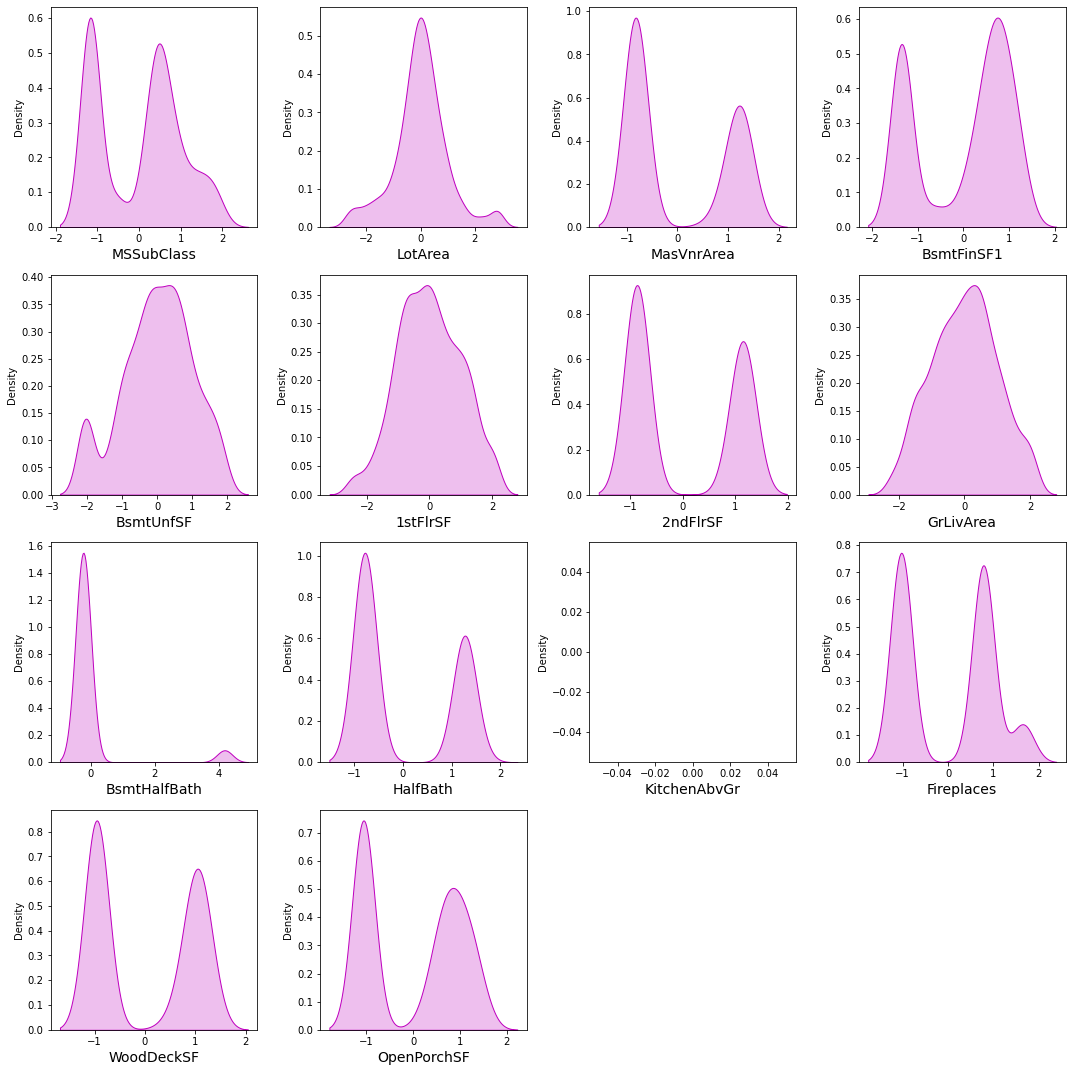

In [373]:
# Checking how the data has been distriubted in each column after removing skewness

plt.figure(figsize=(15,15),facecolor='white')
plotnumber=1
for column in train[skew1] :
    if plotnumber<=14:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(train[column],color="m",kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=14)
    plotnumber+=1
plt.tight_layout()
plt.show()

lets check for skewness in test data

In [374]:
# Checking the skewness
test.skew()

MSSubClass      1.323471
LotFrontage    -0.017005
LotArea         1.266527
OverallQual     0.397312
OverallCond     1.209714
MasVnrArea      1.545675
BsmtFinSF1      0.639990
BsmtUnfSF       0.873375
TotalBsmtSF     0.149160
1stFlrSF        0.596239
2ndFlrSF        0.765511
GrLivArea       0.790479
BsmtFullBath    0.463685
BsmtHalfBath    3.544994
FullBath       -0.049800
HalfBath        0.758892
BedroomAbvGr   -0.345731
KitchenAbvGr    4.253608
TotRmsAbvGrd    0.627431
Fireplaces      0.540164
GarageCars     -0.356072
GarageArea      0.051450
WoodDeckSF      1.317908
OpenPorchSF     1.790292
MoSold          0.186504
YrSold          0.018412
AgeBuilt        0.623131
AgeRemod        0.533693
AgeGarage       0.678577
dtype: float64

The following features contains skewness more than +0.5 and -0.5

MSSubClass,
LotArea,
OverallCond,
MasVnrArea,
BsmtFinSF1,
BsmtUnfSF,
1stFlrSF,
2ndFlrSF,
GrLivArea,
BsmtHalfBath,
HalfBath,
KitchenAbvGr,
TotRmsAbvGrd,
Fireplaces,
WoodDeckSF,
OpenPorchSF,
AgeBuilt and
AgeGarage

Since OverallCond is categorical so no need to remove skewness in this columns. Let's remove skewenss present in the remaining columns.

In [375]:
# Removing skewness using yeo-johnson  method to get better prediction
skew2 = ["MSSubClass","LotArea","MasVnrArea","BsmtFinSF1","BsmtUnfSF","1stFlrSF","2ndFlrSF","GrLivArea","BsmtHalfBath","HalfBath","KitchenAbvGr","TotRmsAbvGrd","Fireplaces","WoodDeckSF","OpenPorchSF","AgeBuilt","AgeGarage"]

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [376]:
test[skew2] = scaler.fit_transform(test[skew2].values)
test[skew2].head()

MSSubClass   LotArea  MasVnrArea  BsmtFinSF1  BsmtUnfSF  1stFlrSF  \
0   -1.149822  1.012372    1.184649    1.212776   0.459512  1.831025   
1    1.341197 -0.878055   -0.846660    1.071176  -0.847801  0.748588   
2   -1.149822  0.565525   -0.846660   -1.376632   1.999450  1.606536   
3    0.706032  0.598156   -0.846660    0.235999  -0.094676 -0.717217   
4    0.507373  1.092887    0.953962   -1.376632   0.880166 -0.591803   

   2ndFlrSF  GrLivArea  BsmtHalfBath  HalfBath  KitchenAbvGr  TotRmsAbvGrd  \
0 -0.870294   0.966245     -0.263813 -0.738058           0.0      0.981907   
1 -0.870294  -0.083846     -0.263813 -0.738058           0.0     -1.613568   
2 -0.870294   0.744611     -0.263813 -0.738058           0.0      0.449228   
3  1.137231   0.337234     -0.263813  1.349285           0.0      0.449228   
4  1.211129   0.983798     -0.263813  1.349285           0.0      1.463878   

   Fireplaces  WoodDeckSF  OpenPorchSF  AgeBuilt  AgeGarage  
0    0.808861    1.121289     0.720332 -1.417238  -1.398277  
1    0.808861    0.815051    -1.112306 -0.008559   0.159148  
2    0.808861    1.156129     1.287751 -0.830966  -0.763392  
3    0.808861   -0.913781    -1.112306  1.066994   1.406311  
4    0.808861    0.955750     0.216312 -1.583151  -1.573401

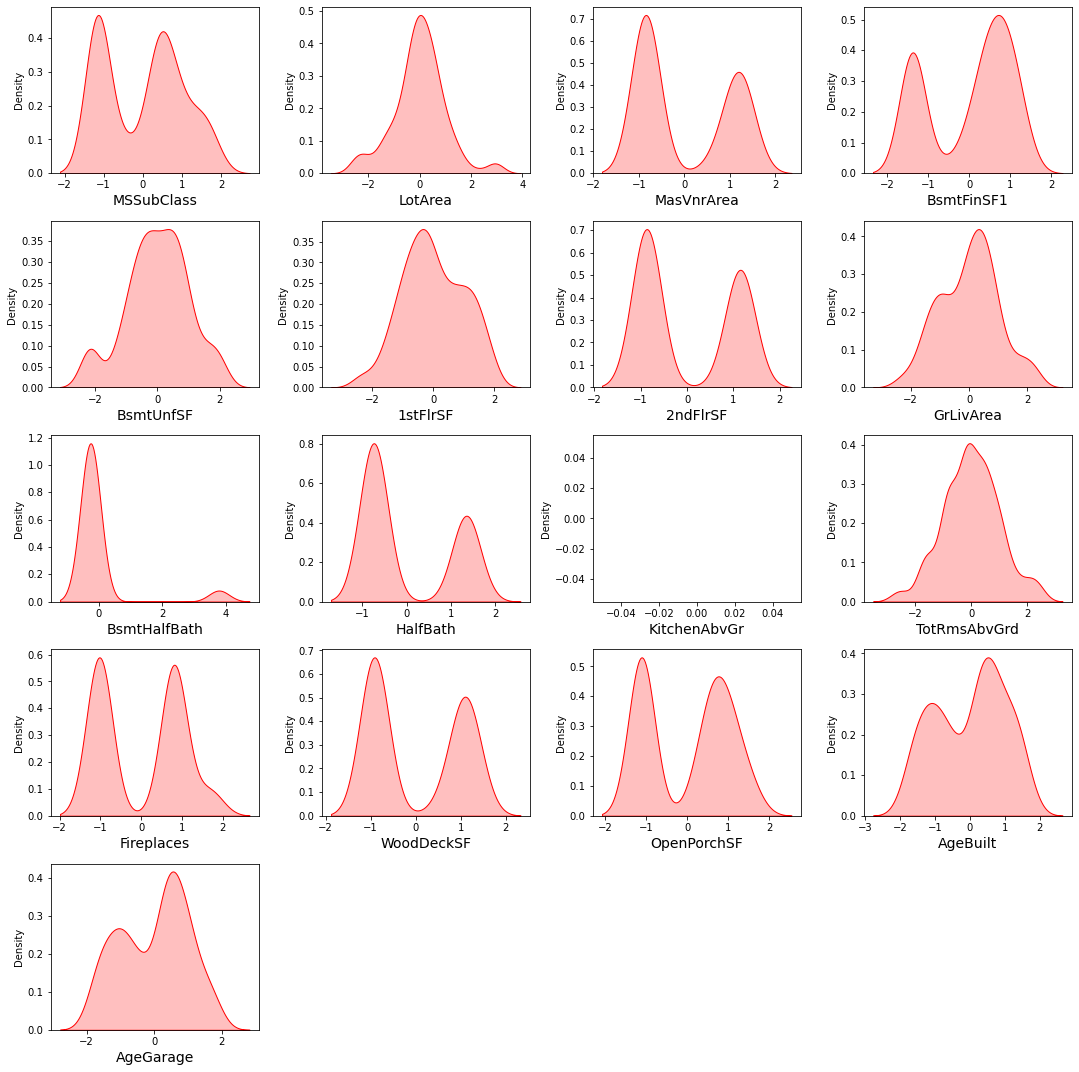

In [377]:
# Checking how the data has been distriubted in each column after removing skewness

plt.figure(figsize=(15,15),facecolor='white')
plotnumber=1
for column in test[skew2] :
    if plotnumber<=17:
        ax=plt.subplot(5,4,plotnumber)
        sns.distplot(test[column],color="r",kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=14)
    plotnumber+=1
plt.tight_layout()
plt.show()

Now lets encode the test and train datasets by using suitable encoding techniques

In [378]:
#encoding train dataset

column = ['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond']
for i in column:
    train[i] = train[i].replace({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})

In [379]:
# Encoding train dataframe using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
for i in train.columns:
    if train[i].dtypes == "object":
        train[i] = enc.fit_transform(train[i].values.reshape(-1,1))

In [380]:
train.head()

MSSubClass  MSZoning  LotFrontage   LotArea  Street  LotShape  LandContour  \
0    1.370435       3.0     70.98847 -1.306083     1.0       0.0          3.0   
1   -1.167999       3.0     95.00000  1.356458     1.0       0.0          3.0   
2    0.490047       3.0     92.00000  0.113089     1.0       0.0          3.0   
3   -1.167999       3.0    105.00000  0.530989     1.0       0.0          3.0   
4   -1.167999       3.0     70.98847  1.497522     1.0       0.0          3.0   

   LotConfig  LandSlope  Neighborhood  Condition1  Condition2  BldgType  \
0        4.0        0.0          13.0         2.0         2.0       4.0   
1        4.0        1.0          12.0         2.0         2.0       0.0   
2        1.0        0.0          15.0         2.0         2.0       0.0   
3        4.0        0.0          14.0         2.0         2.0       0.0   
4        2.0        0.0          14.0         2.0         2.0       0.0   

   HouseStyle  OverallQual  OverallCond  RoofStyle  RoofMatl  Exterior1st  \
0         2.0            6            5        1.0       1.0          8.0   
1         2.0            8            6        0.0       5.0         12.0   
2         5.0            7            5        1.0       1.0          7.0   
3         2.0            6            6        3.0       1.0          8.0   
4         2.0            6            7        1.0       1.0          4.0   

   Exterior2nd  MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  \
0          9.0         2.0   -0.822896          3          3         1.0   
1         13.0         2.0   -0.822896          4          4         2.0   
2          7.0         2.0   -0.822896          4          3         2.0   
3          9.0         1.0    1.385487          3          3         1.0   
4          4.0         3.0    1.140684          4          3         1.0   

   BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  \
0         4         3           3.0           0.0   -0.117054           5.0   
1         3         4           1.0           0.0    0.395541           4.0   
2         4         3           0.0           2.0    0.934402           5.0   
3         4         3           3.0           1.0    0.803940           5.0   
4         4         3           3.0           0.0    1.189724           5.0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0   0.916764      1078.00      1.0          3         1.0         4.0   
1   1.042594      2025.14      1.0          5         1.0         4.0   
2  -0.510359      1117.00      1.0          5         1.0         4.0   
3   1.178365      1844.00      1.0          5         1.0         4.0   
4  -0.230032      1602.00      1.0          4         1.0         4.0   

   1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0 -0.481887 -0.871789  -1.281768             0     -0.238775         2   
1  2.082190 -0.871789   1.377184             1     -0.238775         2   
2  0.048689  1.177246   1.060650             1     -0.238775         2   
3  1.665038 -0.871789   0.775546             0     -0.238775         2   
4  1.201931 -0.871789   0.322952             0      4.188040         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0 -0.782707           2.0           0.0            3           5.0   
1 -0.782707           4.0           0.0            4           8.0   
2  1.268421           3.0           0.0            3           8.0   
3 -0.782707           3.0           0.0            3           7.0   
4 -0.782707           3.0           0.0            4           8.0   

   Functional  Fireplaces  FireplaceQu  GarageType  GarageFinish  GarageCars  \
0         6.0    0.779453            3         1.0           1.0           2   
1         6.0    0.779453            3         1.0           2.0           2   
2         6.0    0.779453            3         1.0           2.0           2   
3         6.0    0.779453            3       

In [381]:
#Encoding the test dataset

# Replacing ratings by numbers on the basis of specific condition
columns = ['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond']
for i in columns:
    test[i] = test[i].replace({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})

In [382]:
# Encoding test dataframe using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
for i in test.columns:
    if test[i].dtypes == "object":
        test[i] = enc.fit_transform(test[i].values.reshape(-1,1))

In [383]:
test.head()

MSSubClass  MSZoning  LotFrontage   LotArea  Street  LotShape  LandContour  \
0   -1.149822       2.0    86.000000  1.012372     1.0       0.0          1.0   
1    1.341197       2.0    66.425101 -0.878055     1.0       0.0          3.0   
2   -1.149822       2.0    66.425101  0.565525     1.0       3.0          3.0   
3    0.706032       2.0    75.000000  0.598156     1.0       3.0          0.0   
4    0.507373       2.0    86.000000  1.092887     1.0       0.0          3.0   

   LotConfig  LandSlope  Neighborhood  Condition1  Condition2  BldgType  \
0        0.0        0.0          21.0         2.0         0.0       0.0   
1        1.0        0.0          21.0         2.0         0.0       4.0   
2        4.0        0.0           4.0         2.0         0.0       0.0   
3        4.0        0.0           5.0         2.0         0.0       0.0   
4        1.0        0.0          20.0         1.0         0.0       0.0   

   HouseStyle  OverallQual  OverallCond  RoofStyle  RoofMatl  Exterior1st  \
0         2.0            9            5        3.0       0.0          9.0   
1         2.0            8            5        1.0       0.0          5.0   
2         2.0            8            5        3.0       0.0          9.0   
3         5.0            7            7        1.0       0.0          6.0   
4         5.0            6            5        1.0       0.0          9.0   

   Exterior2nd  MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  \
0         11.0         3.0    1.184649          4          3         2.0   
1          5.0         2.0   -0.846660          4          3         1.0   
2         11.0         2.0   -0.846660          4          3         2.0   
3          7.0         2.0   -0.846660          3          3         1.0   
4         11.0         3.0    0.953962          4          3         2.0   

   BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  \
0         5         3           1.0           2.0    1.212776           5.0   
1         4         3           0.0           2.0    1.071176           5.0   
2         4         3           0.0           5.0   -1.376632           5.0   
3         3         3           3.0           4.0    0.235999           5.0   
4         4         3           2.0           5.0   -1.376632           5.0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0   0.459512       1922.0      0.0          5         1.0         3.0   
1  -0.847801       1220.0      0.0          4         1.0         3.0   
2   1.999450       1753.0      0.0          5         1.0         3.0   
3  -0.094676        704.0      0.0          5         1.0         3.0   
4   0.880166        894.0      0.0          5         1.0         3.0   

   1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0  1.831025 -0.870294   0.966245             1     -0.263813         2   
1  0.748588 -0.870294  -0.083846             1     -0.263813         1   
2  1.606536 -0.870294   0.744611             0     -0.263813         2   
3 -0.717217  1.137231   0.337234             0     -0.263813         1   
4 -0.591803  1.211129   0.983798             0     -0.263813         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0 -0.738058             3           0.0            4      0.981907   
1 -0.738058             1           0.0            4     -1.613568   
2 -0.738058             3           0.0            5      0.449228   
3  1.349285             3           0.0            2      0.449228   
4  1.349285             4           0.0            4      1.463878   

   Functional  Fireplaces  FireplaceQu  GarageType  GarageFinish  GarageCars  \
0         5.0    0.808861            4         1.0           0.0           3   
1         5.0    0.808861            5         1.0           1.0           2   
2         5.0    0.808861            3         1.0           1.0           2   
3         5.0    0.808861            4       

In [384]:
#finding the corelation between the features in the data set
train.corr()

MSSubClass  MSZoning  LotFrontage   LotArea    Street  \
MSSubClass       1.000000  0.026898    -0.316274 -0.312939 -0.017924   
MSZoning         0.026898  1.000000    -0.084834 -0.058912  0.140215   
LotFrontage     -0.316274 -0.084834     1.000000  0.596143 -0.044573   
LotArea         -0.312939 -0.058912     0.596143  1.000000 -0.072669   
Street          -0.017924  0.140215    -0.044573 -0.072669  1.000000   
LotShape         0.067516  0.053655    -0.157341 -0.287003 -0.012941   
LandContour     -0.030467  0.001175    -0.016620 -0.074834  0.105226   
LotConfig        0.057130 -0.027246    -0.201691 -0.198998  0.000153   
LandSlope       -0.016595 -0.023952     0.023253  0.176280 -0.141572   
Neighborhood    -0.011619 -0.251833     0.091671  0.075420  0.001420   
Condition1      -0.039101 -0.025651    -0.022579  0.069366  0.002189   
Condition2      -0.031881  0.031959     0.011970  0.056741  0.001406   
BldgType         0.586409 -0.024776    -0.467073 -0.524128 -0.013606   
HouseStyle       0.481353 -0.110991     0.057902  0.005503  0.016793   
OverallQual      0.122241 -0.134037     0.230687  0.190547  0.057140   
OverallCond     -0.033927  0.189553    -0.051887  0.010314  0.031082   
RoofStyle       -0.138069  0.000913     0.168101  0.119446 -0.006875   
RoofMatl        -0.028166  0.009719     0.063294  0.220463  0.007889   
Exterior1st     -0.048778 -0.012037     0.079942  0.079181  0.012482   
Exterior2nd     -0.069930  0.005548     0.108934  0.095689  0.014618   
MasVnrType      -0.028288 -0.033521    -0.066054 -0.019842  0.000822   
MasVnrArea       0.004875 -0.037361     0.166180  0.076589  0.020075   
ExterQual        0.062077 -0.160447     0.158712  0.097839  0.091807   
ExterCond       -0.031109  0.097907    -0.001004  0.070513 -0.028096   
Foundation       0.048143 -0.244844     0.090652  0.009319  0.032701   
BsmtQual         0.076728 -0.206193     0.163680  0.116129  0.027107   
BsmtCond        -0.006384 -0.041842     0.047333  0.047736  0.002199   
BsmtExposure    -0.060011  0.037414    -0.121117 -0.144857  0.065253   
BsmtFinType1     0.084234  0.021518    -0.028977 -0.043423 -0.006420   
BsmtFinSF1      -0.100436 -0.036041     0.087060  0.119301  0.008924   
BsmtFinType2     0.056615 -0.031322    -0.015941 -0.073788  0.045208   
BsmtUnfSF       -0.116225 -0.032954     0.130111  0.052521  0.030988   
TotalBsmtSF     -0.293377 -0.065060     0.318263  0.332367  0.016841   
Heating          0.071533  0.051188    -0.036713 -0.021160  0.006981   
HeatingQC        0.018161 -0.149446     0.084699  0.047385  0.038560   
CentralAir      -0.111572 -0.015887     0.087970  0.073866  0.043024   
Electrical       0.036332 -0.079205     0.073880  0.053827  0.038720   
1stFlrSF        -0.312472 -0.037611     0.394878  0.452791  0.009913   
2ndFlrSF         0.558561 -0.016193    -0.036998  0.009290  0.026241   
GrLivArea        0.230677 -0.086858     0.318133  0.397820  0.052837   
BsmtFullBath    -0.067705 -0.009900     0.070859  0.108691 -0.010398   
BsmtHalfBath     0.010020  0.006809     0.011408  0.043299  0.013997   
FullBath         0.197635 -0.188837     0.180823  0.187219  0.033208   
HalfBath         0.295003 -0.125164     0.049731  0.061575  0.045883   
BedroomAbvGr     0.078793 -0.000610     0.278173  0.297515  0.028722   
KitchenAbvGr          NaN       NaN          NaN       NaN       NaN   
KitchenQual      0.048228 -0.133170     0.158665  0.127004  0.068306   
TotRmsAbvGrd     0.192707 -0.024508     0.323070  0.369388  0.039782   
Functional       0.037758 -0.091684     0.037977 -0.025038 -0.015309   
Fireplaces       0.029802  0.009349     0.227523  0.328380  0.021069   
FireplaceQu     -0.004202 -0.011942    -0.059379 -0.096589 -0.027427   
GarageType       0.104343  0.125155    -0.243693 -0.201895 -0.000824   
GarageFinish    -0.023714  0.162566    -0.202471 -0.155464 -0.001178   
GarageCars       0.000675 -0.130963     0.297190  0.272560  0.001838   
GarageArea      -0.075152 -0.163414     0.334422  0.319

In [385]:
#sorting the correlation values of SalePrice with all the columns
train.corr()['SalePrice'].sort_values()

GarageFinish    -0.537121
AgeBuilt        -0.526644
AgeGarage       -0.516445
AgeRemod        -0.510784
GarageType      -0.299470
BsmtExposure    -0.268559
LotShape        -0.248171
MSZoning        -0.133221
Heating         -0.100021
BsmtFinType1    -0.092109
BldgType        -0.066028
OverallCond     -0.065642
LotConfig       -0.060452
SaleType        -0.050851
YrSold          -0.045508
BsmtHalfBath    -0.009658
FireplaceQu     -0.004503
MSSubClass      -0.001252
MasVnrType       0.007732
LandSlope        0.015485
BsmtFinType2     0.032285
LandContour      0.032836
Condition2       0.033956
ExterCond        0.038282
Street           0.044753
MoSold           0.072764
Exterior2nd      0.097541
Condition1       0.105820
Exterior1st      0.108451
Functional       0.118673
GarageCond       0.119962
GarageQual       0.147272
RoofMatl         0.159865
2ndFlrSF         0.167816
BedroomAbvGr     0.177452
BsmtCond         0.181625
RoofStyle        0.192654
BsmtUnfSF        0.193140
Neighborhood

We can observe that all the no feature is strongly corelated with the label(SalePrice). To get amore clear view lets plot the heatmap.

<AxesSubplot:>

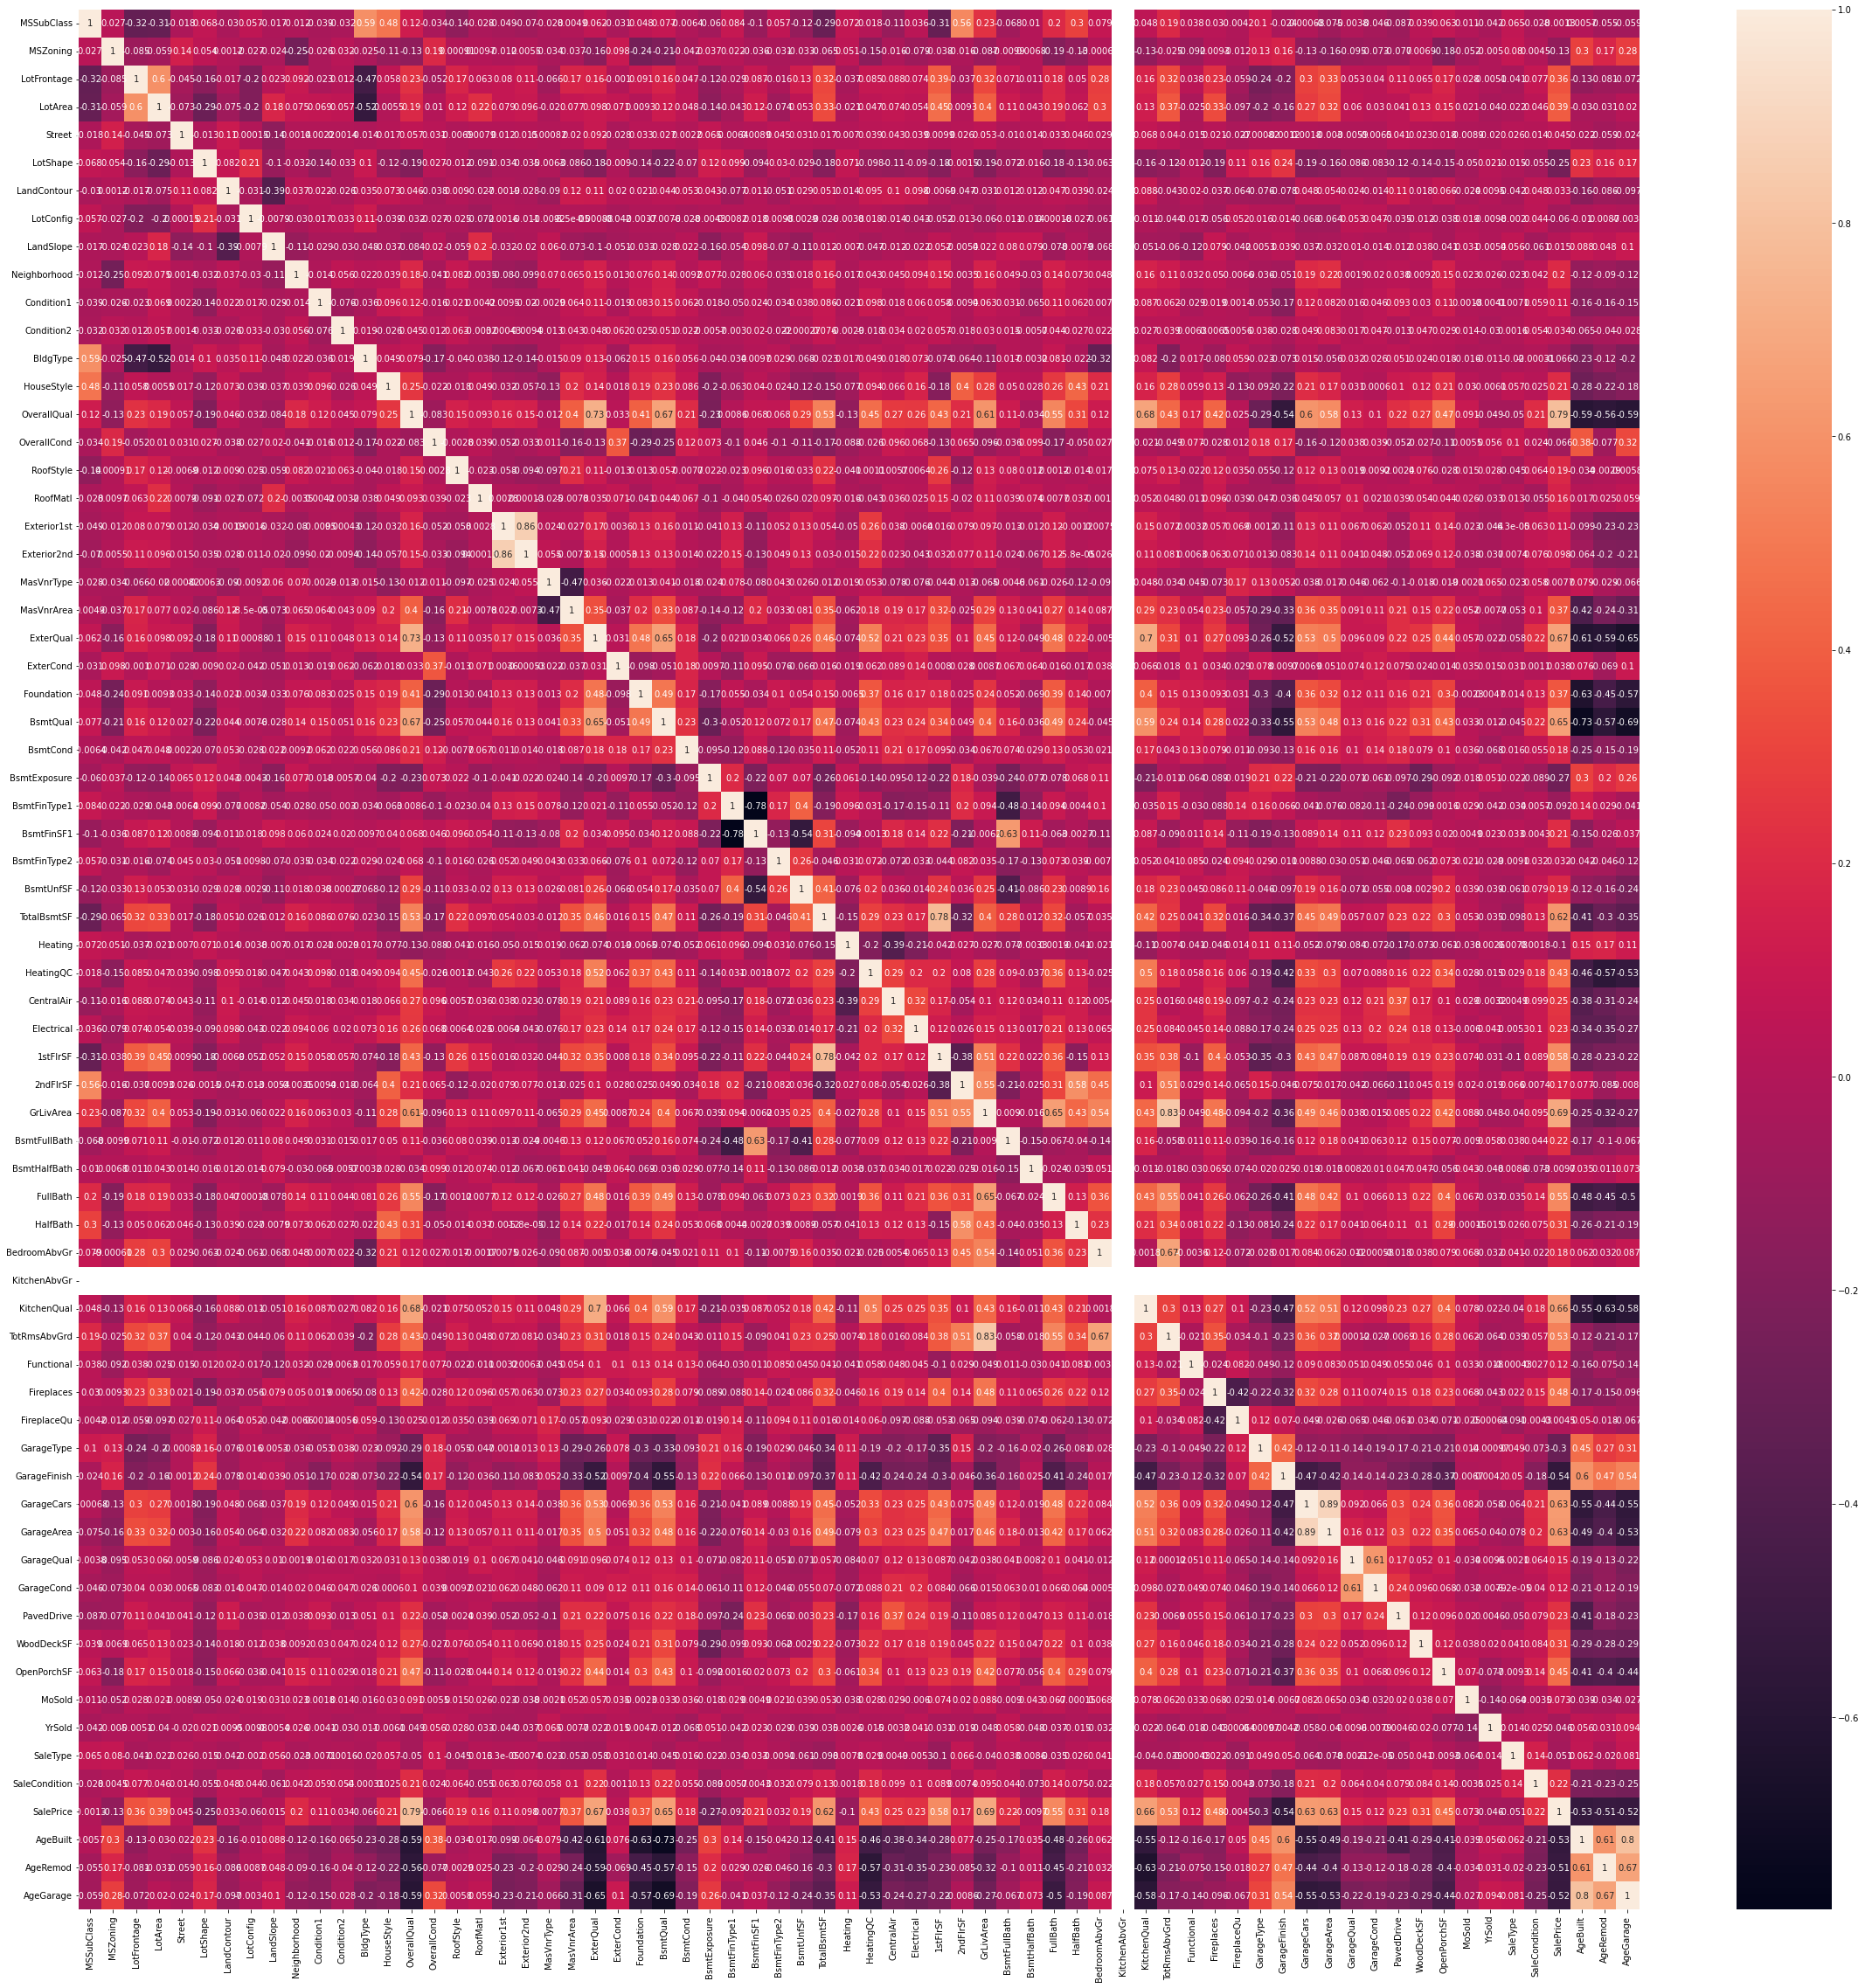

In [386]:
#now lets find out the co relation among the features(multicolinearity) using heatmap plot.
plt.figure(figsize=(40,40))
sns.heatmap(train.corr(),annot=True)

We can observe that some features are highly correlated among each other. this is called multicolinearity. We will use Vif to find the multicolinearity scores later.

In [387]:
#Lets plot some more graphs to have a better understanding of the data 
#now lets split the dataset into features and labels 

y=train['SalePrice']
x=train.drop(columns=['SalePrice'])

In [388]:
x

MSSubClass  MSZoning  LotFrontage   LotArea  Street  LotShape  \
0       1.370435       3.0     70.98847 -1.306083     1.0       0.0   
1      -1.167999       3.0     95.00000  1.356458     1.0       0.0   
2       0.490047       3.0     92.00000  0.113089     1.0       0.0   
3      -1.167999       3.0    105.00000  0.530989     1.0       0.0   
4      -1.167999       3.0     70.98847  1.497522     1.0       0.0   
5       0.490047       3.0     58.00000  1.009370     1.0       0.0   
6      -1.167999       3.0     70.98847  0.440654     1.0       0.0   
7      -1.167999       3.0     88.00000  0.821907     1.0       3.0   
8      -1.167999       3.0     70.00000 -0.070080     1.0       3.0   
9       0.237618       3.0     80.00000 -0.245887     1.0       3.0   
10      0.237618       4.0     50.00000 -0.214772     1.0       3.0   
11      0.490047       3.0     44.00000  0.023209     1.0       0.0   
12     -1.167999       3.0    121.66000 -0.063598     1.0       0.0   
13     -1.167999       3.0     80.00000 -0.140023     1.0       0.0   
14      0.237618       3.0     59.00000  1.466868     1.0       0.0   
15      0.696557       3.0     55.00000  0.270952     1.0       3.0   
16     -0.517772       4.0     70.98847 -0.986512     1.0       3.0   
17     -1.167999       3.0     64.00000 -0.561521     1.0       3.0   
18     -1.167999       3.0     70.98847 -0.395148     1.0       0.0   
19      1.700798       4.0     24.00000 -2.566321     1.0       3.0   
20      0.490047       3.0     80.00000  0.677984     1.0       3.0   
21      0.947809       3.0     70.00000 -0.255007     1.0       3.0   
22     -1.167999       3.0     68.00000  0.064272     1.0       3.0   
23     -1.167999       3.0     70.98847  0.286391     1.0       0.0   
24     -1.167999       3.0     71.00000 -0.055136     1.0       3.0   
25     -1.167999       3.0     70.98847  2.237600     1.0       3.0   
26     -0.517772       3.0     70.98847  2.854711     1.0       3.0   
27     -1.167999       3.0     88.00000  0.452429     1.0       3.0   
28      0.087651       4.0     58.00000 -0.834574     1.0       3.0   
29      0.696557       3.0     74.00000  0.582432     1.0       0.0   
30      1.370435       3.0     61.00000 -0.465739     1.0       3.0   
31      0.490047       4.0     60.00000 -1.902217     1.0       3.0   
32      1.019927       3.0     70.98847  1.891437     1.0       0.0   
33      0.237618       4.0     70.98847  0.661658     1.0       0.0   
34      0.490047       3.0     70.98847  1.147785     1.0       1.0   
35     -1.167999       3.0    120.00000  0.216145     1.0       3.0   
36     -1.167999       3.0     80.00000  0.226414     1.0       3.0   
37     -1.167999       3.0     84.00000  0.715936     1.0       3.0   
38      0.947809       3.0     70.98847 -0.498328     1.0       0.0   
39     -0.083577       4.0     50.00000 -0.087583     1.0       3.0   
40     -1.167999       3.0    121.66000  2.854711     1.0       0.0   
41     -1.167999       3.0     70.00000  0.857755     1.0       3.0   
42      1.700798       1.0     30.00000 -1.988321     1.0       3.0   
43      1.700798       4.0     24.00000 -2.297447     1.0       3.0   
44      0.870404       3.0     65.00000 -0.270690     1.0       3.0   
45     -1.167999       3.0     76.00000 -0.289325     1.0       3.0   
46      0.490047       3.0     60.00000 -0.339889     1.0       0.0   
47     -1.167999       4.0    100.00000  0.585022     1.0       3.0   
48     -1.167999       3.0     50.00000 -1.281058     1.0       3.0   
49     -1.167999       3.0     70.00000 -0.391368     1.0       3.0   
50     -1.167999       3.0     85.00000  1.063963     1.0       3.0   
51      0.237618       4.0     60.00000  0.235729     1.0       3.0   
52     -0.517772       3.0     60.00000 -0.266763     1.0       3.0   
53     -1.167999       3.0     64.00000 -0.185941     1.0       0.0   
54     -1.167999       3.0     60.00000  0.386729     1.0       3.0   
55     -1.167999       3.0    

In [389]:
x.shape

(1168, 67)

In [390]:
y

0       128000
1       268000
2       269790
3       190000
4       215000
5       219210
6       121500
7       155000
8       140000
9       118500
10      119500
11      237000
12      201000
13      126500
14      135500
15      165000
16      120500
17      194500
18      148000
19      106000
20      231500
21      133000
22      142125
23      136500
24      146000
25      217000
26      112000
27      394432
28      113000
29      188700
30      319900
31      135000
32      190000
33      128500
34      169000
35      122000
36      152000
37      243000
38      156000
39       79500
40      215000
41      132000
42      144152
43      130000
44      149900
45      124500
46      179000
47      147000
48       39300
49      155000
50      312500
51      256000
52       60000
53      153000
54       84900
55      230000
56      180000
57      190000
58      106500
59      239000
60      107500
61      123000
62      176000
63      228500
64      117500
65      350000
66      13

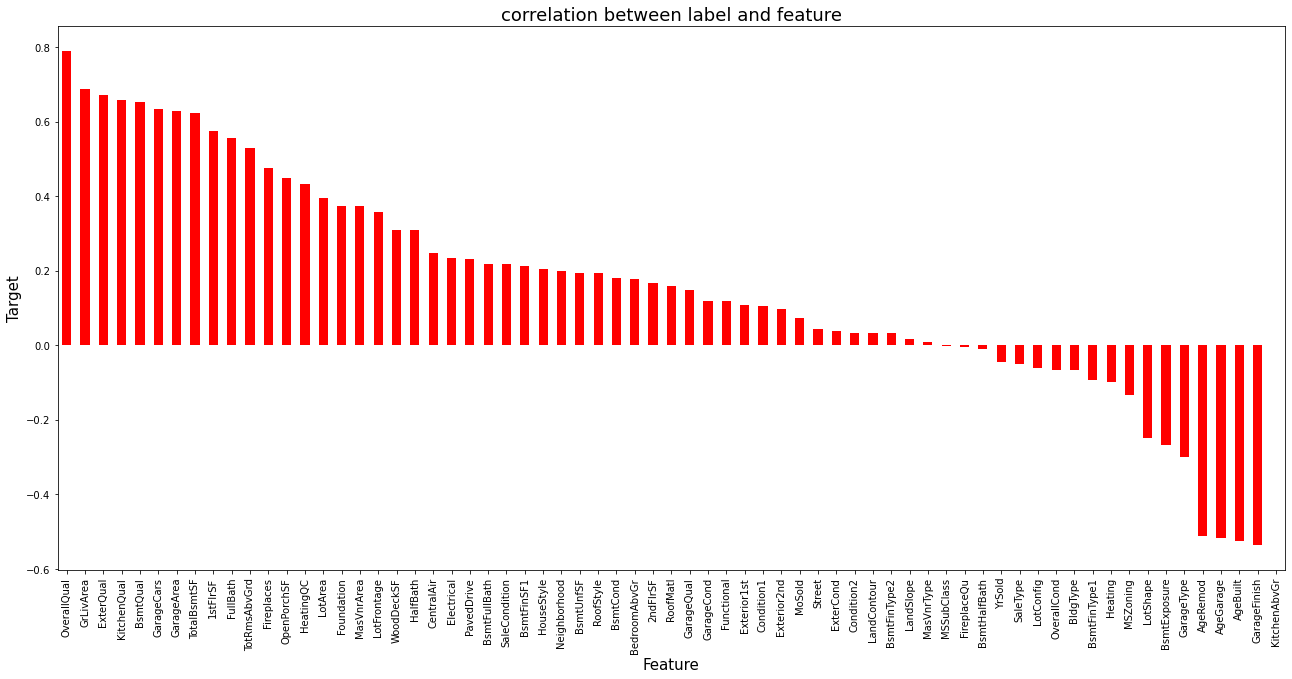

In [391]:
#Correlation between the feature and label
plt.figure(figsize=(22,10))
train.corr()['SalePrice'].sort_values(ascending=False).drop(['SalePrice']).plot(kind='bar',color='r')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title('correlation between label and feature',fontsize=18)
plt.show()

In [392]:
#using standard scalar for scaling the model
from sklearn.preprocessing import StandardScaler
scalar= StandardScaler()
x_scaled=scalar.fit_transform(x)

In [393]:
x_scaled.shape[1]

67

In [394]:
#computing vif for all the features
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]
vif['Features']=x.columns

vif

VIF       Features
0    5.713488     MSSubClass
1    1.360230       MSZoning
2    2.034551    LotFrontage
3    2.646135        LotArea
4    1.105741         Street
5    1.286923       LotShape
6    1.337008    LandContour
7    1.149363      LotConfig
8    1.457392      LandSlope
9    1.247096   Neighborhood
10   1.145185     Condition1
11   1.081437     Condition2
12   4.393946       BldgType
13   2.558012     HouseStyle
14   4.195415    OverallQual
15   2.159973    OverallCond
16   1.261527      RoofStyle
17   1.205322       RoofMatl
18   4.309391    Exterior1st
19   4.341659    Exterior2nd
20   1.553896     MasVnrType
21   1.990250     MasVnrArea
22   3.314137      ExterQual
23   1.317008      ExterCond
24   2.134149     Foundation
25   3.255388       BsmtQual
26   1.253280       BsmtCond
27   1.598319   BsmtExposure
28   3.034550   BsmtFinType1
29   6.236965     BsmtFinSF1
30   1.346964   BsmtFinType2
31   4.581997      BsmtUnfSF
32   7.577665    TotalBsmtSF
33   1.326339        Heating
34   1.898682      HeatingQC
35   1.685249     CentralAir
36   1.378262     Electrical
37  13.121291       1stFlrSF
38  13.751327       2ndFlrSF
39  19.935110      GrLivArea
40   2.231707   BsmtFullBath
41   1.230417   BsmtHalfBath
42   3.135776       FullBath
43   2.484583       HalfBath
44   2.690293   BedroomAbvGr
45        NaN   KitchenAbvGr
46   2.774098    KitchenQual
47   4.735836   TotRmsAbvGrd
48   1.242739     Functional
49   2.176242     Fireplaces
50   1.545188    FireplaceQu
51   1.769888     GarageType
52   2.075835   GarageFinish
53   6.496379     GarageCars
54   6.618875     GarageArea
55   1.811850     GarageQual
56   1.820513     GarageCond
57   1.528738     PavedDrive
58   1.320669     WoodDeckSF
59   1.612165    OpenPorchSF
60   1.084214         MoSold
61   1.112910         YrSold
62   1.123099       SaleType
63   1.194518  SaleCondition
64   8.466503       AgeBuilt
65   3.213674       AgeRemod
66   5.612681      AgeGarage

Here the column "GrLivArea" has VIF above 10 which means this feature causing multicollinearity problem. Let's drop this column.

In [395]:
x.drop("GrLivArea",axis=1,inplace=True)

In [396]:
#using standard scalar for scaling the model
from sklearn.preprocessing import StandardScaler
scalar= StandardScaler()
x_scaled=scalar.fit_transform(x)

In [397]:
#computing vif for all the features
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]
vif['Features']=x.columns

vif

VIF       Features
0   5.693084     MSSubClass
1   1.359386       MSZoning
2   2.030565    LotFrontage
3   2.644317        LotArea
4   1.099567         Street
5   1.285268       LotShape
6   1.336602    LandContour
7   1.149112      LotConfig
8   1.452591      LandSlope
9   1.243868   Neighborhood
10  1.144204     Condition1
11  1.079412     Condition2
12  4.365960       BldgType
13  2.503260     HouseStyle
14  4.175306    OverallQual
15  2.152275    OverallCond
16  1.259230      RoofStyle
17  1.203302       RoofMatl
18  4.305353    Exterior1st
19  4.332219    Exterior2nd
20  1.546577     MasVnrType
21  1.989515     MasVnrArea
22  3.314125      ExterQual
23  1.312432      ExterCond
24  2.113847     Foundation
25  3.249337       BsmtQual
26  1.253243       BsmtCond
27  1.596317   BsmtExposure
28  3.034356   BsmtFinType1
29  6.234663     BsmtFinSF1
30  1.346147   BsmtFinType2
31  4.581370      BsmtUnfSF
32  7.535892    TotalBsmtSF
33  1.324474        Heating
34  1.893913      HeatingQC
35  1.680440     CentralAir
36  1.377402     Electrical
37  6.490990       1stFlrSF
38  6.545980       2ndFlrSF
39  2.231588   BsmtFullBath
40  1.229208   BsmtHalfBath
41  2.955559       FullBath
42  2.391212       HalfBath
43  2.657332   BedroomAbvGr
44       NaN   KitchenAbvGr
45  2.773439    KitchenQual
46  4.361712   TotRmsAbvGrd
47  1.236563     Functional
48  2.141506     Fireplaces
49  1.536731    FireplaceQu
50  1.769887     GarageType
51  2.067198   GarageFinish
52  6.491140     GarageCars
53  6.571639     GarageArea
54  1.807059     GarageQual
55  1.819609     GarageCond
56  1.527704     PavedDrive
57  1.319667     WoodDeckSF
58  1.601247    OpenPorchSF
59  1.083084         MoSold
60  1.112885         YrSold
61  1.121457       SaleType
62  1.194159  SaleCondition
63  8.343810       AgeBuilt
64  3.209383       AgeRemod
65  5.608571      AgeGarage

the multicolinearity issue is almost resolved now. now lets delete the same column from test dataset also.

In [398]:
test.head()

MSSubClass  MSZoning  LotFrontage   LotArea  Street  LotShape  LandContour  \
0   -1.149822       2.0    86.000000  1.012372     1.0       0.0          1.0   
1    1.341197       2.0    66.425101 -0.878055     1.0       0.0          3.0   
2   -1.149822       2.0    66.425101  0.565525     1.0       3.0          3.0   
3    0.706032       2.0    75.000000  0.598156     1.0       3.0          0.0   
4    0.507373       2.0    86.000000  1.092887     1.0       0.0          3.0   

   LotConfig  LandSlope  Neighborhood  Condition1  Condition2  BldgType  \
0        0.0        0.0          21.0         2.0         0.0       0.0   
1        1.0        0.0          21.0         2.0         0.0       4.0   
2        4.0        0.0           4.0         2.0         0.0       0.0   
3        4.0        0.0           5.0         2.0         0.0       0.0   
4        1.0        0.0          20.0         1.0         0.0       0.0   

   HouseStyle  OverallQual  OverallCond  RoofStyle  RoofMatl  Exterior1st  \
0         2.0            9            5        3.0       0.0          9.0   
1         2.0            8            5        1.0       0.0          5.0   
2         2.0            8            5        3.0       0.0          9.0   
3         5.0            7            7        1.0       0.0          6.0   
4         5.0            6            5        1.0       0.0          9.0   

   Exterior2nd  MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  \
0         11.0         3.0    1.184649          4          3         2.0   
1          5.0         2.0   -0.846660          4          3         1.0   
2         11.0         2.0   -0.846660          4          3         2.0   
3          7.0         2.0   -0.846660          3          3         1.0   
4         11.0         3.0    0.953962          4          3         2.0   

   BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  \
0         5         3           1.0           2.0    1.212776           5.0   
1         4         3           0.0           2.0    1.071176           5.0   
2         4         3           0.0           5.0   -1.376632           5.0   
3         3         3           3.0           4.0    0.235999           5.0   
4         4         3           2.0           5.0   -1.376632           5.0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0   0.459512       1922.0      0.0          5         1.0         3.0   
1  -0.847801       1220.0      0.0          4         1.0         3.0   
2   1.999450       1753.0      0.0          5         1.0         3.0   
3  -0.094676        704.0      0.0          5         1.0         3.0   
4   0.880166        894.0      0.0          5         1.0         3.0   

   1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0  1.831025 -0.870294   0.966245             1     -0.263813         2   
1  0.748588 -0.870294  -0.083846             1     -0.263813         1   
2  1.606536 -0.870294   0.744611             0     -0.263813         2   
3 -0.717217  1.137231   0.337234             0     -0.263813         1   
4 -0.591803  1.211129   0.983798             0     -0.263813         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0 -0.738058             3           0.0            4      0.981907   
1 -0.738058             1           0.0            4     -1.613568   
2 -0.738058             3           0.0            5      0.449228   
3  1.349285             3           0.0            2      0.449228   
4  1.349285             4           0.0            4      1.463878   

   Functional  Fireplaces  FireplaceQu  GarageType  GarageFinish  GarageCars  \
0         5.0    0.808861            4         1.0           0.0           3   
1         5.0    0.808861            5         1.0           1.0           2   
2         5.0    0.808861            3         1.0           1.0           2   
3         5.0    0.808861            4       

In [401]:
scalar = StandardScaler()
test = pd.DataFrame(scaler.fit_transform(test), columns=test.columns)
test.head()

MSSubClass  MSZoning  LotFrontage   LotArea    Street  LotShape  \
0   -1.155379 -0.283165     1.069982  1.012003  0.083045 -1.392667   
1    1.331530 -0.283165     0.015240 -0.877865  0.083045 -1.392667   
2   -1.155379 -0.283165     0.015240  0.567065  0.083045  0.748880   
3    0.712815 -0.283165     0.475792  0.599586  0.083045  0.748880   
4    0.517615 -0.283165     1.069982  1.092090  0.083045 -1.392667   

   LandContour  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
0    -3.162098  -1.784025  -0.232705      1.467347    0.052151   -0.058621   
1     0.319149  -1.582249  -0.232705      1.467347    0.052151   -0.058621   
2     0.319149   0.617410  -0.232705     -1.313675    0.052151   -0.058621   
3    -3.163564   0.617410  -0.232705     -1.113326    0.052151   -0.058621   
4     0.319149  -1.582249  -0.232705      1.325410   -1.407857   -0.058621   

   BldgType  HouseStyle  OverallQual  OverallCond  RoofStyle  RoofMatl  \
0 -0.470822   -0.415082     1.955022    -0.387299   1.704942 -0.083045   
1  2.145164   -0.415082     1.365652    -0.387299  -0.454097 -0.083045   
2 -0.470822   -0.415082     1.365652    -0.387299   1.704942 -0.083045   
3 -0.470822    1.009565     0.723224     1.397520  -0.454097 -0.083045   
4 -0.470822    1.009565     0.015324    -0.387299  -0.454097 -0.083045   

   Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  ExterQual  ExterCond  \
0     0.681083     0.733281    1.919548    1.185010   1.178307  -0.230706   
1    -1.112346    -1.281646    0.365508   -0.850810   1.178307  -0.230706   
2     0.681083     0.733281    0.365508   -0.850810   1.178307  -0.230706   
3    -0.734295    -0.724109    0.365508   -0.850810  -0.606223  -0.230706   
4     0.681083     0.733281    1.919548    1.050342   1.178307  -0.230706   

   Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  \
0    0.786288  1.871293 -0.035682     -1.529861     -0.289677    1.464413   
1   -0.490893  0.676196 -0.035682     -1.812424     -0.289677    1.221499   
2    0.786288  0.676196 -0.035682     -1.812424      1.224964   -1.291106   
3   -0.490893 -0.825273 -0.035682      0.639975      0.755295    0.016624   
4    0.786288  0.676196 -0.035682     -0.784241      1.224964   -1.291106   

   BsmtFinType2  BsmtUnfSF  TotalBsmtSF   Heating  HeatingQC  CentralAir  \
0      0.344186   0.425442     2.053299 -0.156721   0.888883    0.248633   
1      0.344186  -0.861567     0.472182 -0.156721  -0.445500    0.248633   
2      0.344186   2.151886     1.682958 -0.156721   0.888883    0.248633   
3      0.344186  -0.143785    -0.788924 -0.156721   0.888883    0.248633   
4      0.344186   0.879281    -0.311029 -0.156721   0.888883    0.248633   

   Electrical  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0    0.319162  1.806090 -0.870852   0.966521      1.170981     -0.263813   
1    0.319162  0.753022 -0.870852  -0.093131      1.170981     -0.263813   
2    0.319162  1.589017 -0.870852   0.741240     -0.846389     -0.263813   
3    0.319162 -0.712309  1.141995   0.329213     -0.846389     -0.263813   
4    0.319162 -0.584755  1.187448   0.984392     -0.846389     -0.263813   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0  0.777618 -0.738208      0.264387           0.0     0.854822      0.981828   
1 -1.051784 -0.738208     -2.209568           0.0     0.854822     -1.615355   
2  0.777618 -0.738208      0.264387           0.0     2.064266      0.450078   
3 -1.051784  1.353054      0.264387           0.0    -2.708468      0.450078   
4  0.777618  1.353054      1.820031           0.0     0.854822      1.462548   

   Functional  Fireplaces  FireplaceQu  GarageType  GarageFinish  GarageCars  \
0    0.248627    0.816449     0.448143   -0.637972     -1.435411    1.836465   
1    0.248627    0.816449     4.729157   -0.637972     -0.322002    0.330892   
2    0.248627    0.816449    -1.470970   -0.637972     -0.322002    0.330892   
3    0.248627    0.816449  

In [402]:
test.drop("GrLivArea",axis=1,inplace=True)

# Building Regression model and chosing the best one among them

In [404]:
#splitting the data between train and test. the model will be built(trained) on the train data and tested on test data

x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=488)
y_train.head()


1083    202500
109     120500
99      205950
199     237500
155     119000
Name: SalePrice, dtype: int64

In [405]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [406]:
regression=LinearRegression()
knn=KNeighborsRegressor()
rf=RandomForestRegressor()
svr=SVR()
dtc=DecisionTreeRegressor()

LinearRegression()
adjusted R2 score for training data------ 0.830734384951073
adjusted R2 score for testing data------ 0.8173363475569375
mean absolute error------ 20666.47324987143
mean squared error------ 1140920609.8048487
root mean squared error------ 33777.51633564624


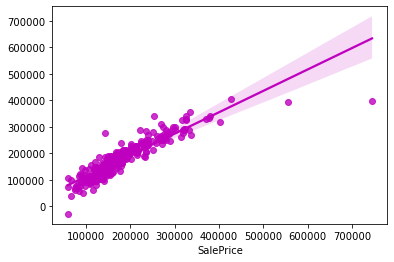

KNeighborsRegressor()
adjusted R2 score for training data------ 0.8128694914401822
adjusted R2 score for testing data------ 0.7838500202348965
mean absolute error------ 22827.45410958904
mean squared error------ 1350076840.272192
root mean squared error------ 36743.39179052734


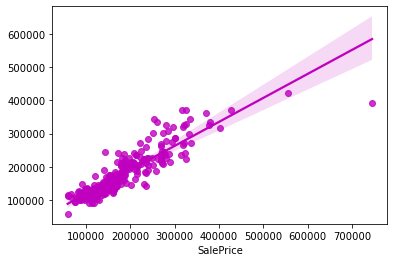

SVR()
adjusted R2 score for training data------ -0.04728498637688827
adjusted R2 score for testing data------ -0.03393316982929773
mean absolute error------ 55190.04999460517
mean squared error------ 6457966031.237678
root mean squared error------ 80361.47106193165


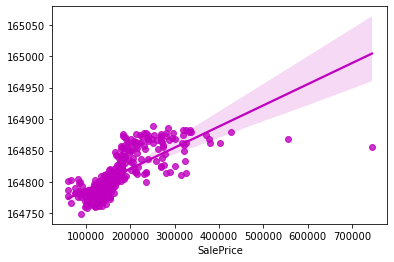

RandomForestRegressor()
adjusted R2 score for training data------ 0.9737284137383279
adjusted R2 score for testing data------ 0.8655706665445837
mean absolute error------ 18844.537979452056
mean squared error------ 839648145.9244907
root mean squared error------ 28976.68279711276


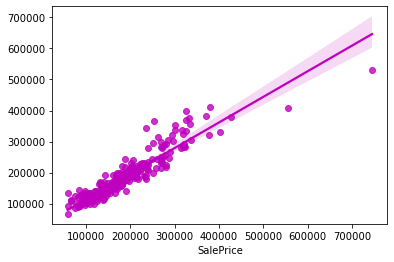

DecisionTreeRegressor()
adjusted R2 score for training data------ 1.0
adjusted R2 score for testing data------ 0.7442932917793881
mean absolute error------ 27808.75684931507
mean squared error------ 1597148910.4280822
root mean squared error------ 39964.34548979981


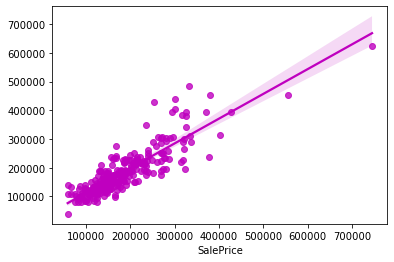

In [409]:
models = [regression, knn, svr, rf,dtc]
for m in models:
    print (m)
    m.fit(x_train, y_train)
    y_pred = m.predict(x_test)
    print ('adjusted R2 score for training data------',m.score(x_train, y_train))
    print ('adjusted R2 score for testing data------',m.score(x_test, y_test))
    print ("mean absolute error------",mean_absolute_error(y_test,y_pred))
    print ("mean squared error------",mean_squared_error(y_test,y_pred))
    print ("root mean squared error------",np.sqrt(mean_squared_error(y_test,y_pred)))
    sns.regplot(y_test,y_pred,color="m")
    plt.show()


In [411]:
# Cross validation scores for all models
from sklearn.model_selection import cross_val_score
for m in models:
    c_v= cross_val_score(m, x_scaled, y, cv = 10)
    print ('Cross Validation Score for ',m, ' is :', c_v.mean())
    print (' ')

Cross Validation Score for  LinearRegression()  is : 0.8070324237682417
 
Cross Validation Score for  KNeighborsRegressor()  is : 0.7438954640638589
 
Cross Validation Score for  SVR()  is : -0.06088659516394675
 
Cross Validation Score for  RandomForestRegressor()  is : 0.8314994527794763
 
Cross Validation Score for  DecisionTreeRegressor()  is : 0.574229067871293
 


After analysing all the models we have concluded that RandomForestRegressor() model gives the best R2 score and cross validation score. And based on the R2 score we have chosen RandomForestRegressor() as the best model. We will use RandomForestRegressor() model for further analysis.

# Hyperparameter Tuning of RandomForestRegressor() model using GridSearchCV

In [412]:
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
param_grid={'min_samples_split': [2, 5, 10],'max_features':['auto', 'sqrt'],'min_samples_leaf':[1,2,4,6],'n_estimators': [2,5,8,10,17]}

In [413]:
gridsearch=GridSearchCV(estimator=rf , param_grid=param_grid )

In [414]:
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [2, 5, 8, 10, 17]})

In [415]:
gridsearch.best_params_

{'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 17}

In [418]:
rf=RandomForestRegressor(max_features='sqrt', min_samples_leaf=2,min_samples_split=5,n_estimators=17)

In [419]:
rf.fit(x_train,y_train)

RandomForestRegressor(max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=5, n_estimators=17)

In [421]:
y_pred=rf.predict(x_test)


In [425]:
y_pred

array([155926.20868347, 159002.39215686, 125890.90252101, 170074.26470588,
       109577.32352941, 275368.24607843, 195104.28688142, 144455.90616246,
       177241.04575163, 115262.26470588, 139023.56325864, 145229.90569561,
       164249.07200316, 158296.21848739, 121394.18113912, 125710.32142857,
       132968.92156863, 120868.54761905, 156468.93093965, 174466.83006536,
       101087.01988796, 224661.30252101,  91506.59313725, 186310.78431373,
       313691.94509804, 287555.06218487, 103479.94215686, 132426.43641457,
       134624.14565826, 139416.97712418, 144712.21078431, 108499.1713352 ,
       169775.57189542, 137847.2248366 , 141909.27829132, 179894.40373483,
       152781.49159664, 129197.57012138, 329588.09012605, 222317.61951447,
       113595.74369748,  97779.58053221, 161720.0270775 , 112932.5857737 ,
       210626.39215686, 115342.54656863, 120958.31139122, 123642.80473856,
       137748.7535014 , 154150.72829132, 142100.50093371, 156760.5620915 ,
       137870.49486461, 1

In [422]:
rf.score(x_train,y_train)

0.931495566813185

In [423]:
rf.score(x_test, y_test)


0.8219097130822915

After using hyperparameter tunning we have observed that the R2 score has increased for the RandomForestRegressor() model.

# Predicting from the test dataset.


In [427]:
prediction = rf.predict(test)
prediction

array([327152.7875817 , 232767.03641457, 257653.78039216, 166909.23319328,
       221593.33263305,  97407.77310924, 143675.8767507 , 317514.55784314,
       234699.7805789 , 169635.53711485,  88548.07352941, 144891.52661064,
       122377.55882353, 217821.        , 306989.91561625, 133403.66218487,
       119373.16526611, 125661.94467787, 164296.56582633, 179350.01876751,
       163081.51260504, 156153.43137255, 153816.01493931, 107968.63305322,
       101187.54201681, 126237.34052288, 175903.01470588, 145748.91456583,
       191612.52917834, 106682.49719888, 134219.15919701, 214839.7535014 ,
       241985.15336134, 160962.58403361, 127808.08123249, 177720.27394958,
       203051.33053221, 116196.81372549, 159830.35947712, 149340.65837104,
       115824.7797619 , 278452.58496732, 199951.92810458, 189729.35154062,
       147221.49859944, 134450.81680672, 131577.94677871,  97193.72794118,
       213002.27310924, 323804.20070028, 135080.88235294, 188649.67973856,
       106586.71176471, 1

In [429]:
#saving the machine learning model
import pickle
filename='finalized_model.pickle17'
pickle.dump(rf,open('finalized_model.pickle17','wb'))

# Conclusions

The houses which have very excellent overall quality like material and finish of the house have high sale price. Also we have observed from the plot that as the overall quality of the house increases,the sale price also increases. That is there is good linear relation between SalePrice and OverallQual. So, if the seller builds the house according to these types of qualities that will increase the sale price of the house.

There is a linear relation between the SalePrice and 1stFlrSF. As we have seen as the 1st floor area increases, sales price also increases moderately. So, people like to live in the houses which have only 1-2 floors and the cost of the house also increases in this case.

Also, we have seen the positive linear relation between the SalePrice and GarageArea. As size of garage area increases, sale price also increases.

There is positive linear relation between sale price nad TotalBsmtSF. As total basement area increases, sale price also increases.

Uisng the features which have some relation with target we have built many ML models also seen the increase in accuracy of the best model.